In [2]:
import quandl
quandl.ApiConfig.api_key = 'N5RBJdsvdn3ry5aXWXz5'

import matplotlib.pylab as plt
from IPython import display

import numpy as np
import scipy as sc
import numpy.random
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns
import itertools
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [5]:

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '1995-12-31', 'lte': '2018-12-31' }, 
                        paginate=True)
data.head()

ticker       date  adj_close
None                             
0      AAPL 1996-01-02   1.032288
1      AAPL 1996-01-03   1.032288
2      AAPL 1996-01-04   1.013975
3      AAPL 1996-01-05   1.100401
4      AAPL 1996-01-08   1.112609

In [6]:
data.tail()

ticker       date  adj_close
None                              
16785    WMT 2018-03-21      88.18
16786    WMT 2018-03-22      87.14
16787    WMT 2018-03-23      85.42
16788    WMT 2018-03-26      87.50
16789    WMT 2018-03-27      86.05

In [3]:
# create a new dataframe with 'date' column as index
new = data.set_index('date')
# use pandas pivot function to sort adj_close by tickers
df = new.pivot(columns='ticker')
# check the head of the output
df.head()

adj_close                    
ticker          AAPL      MSFT       WMT
date                                    
1996-01-02  1.032288  3.734112  8.263109
1996-01-03  1.032288  3.614287  8.351959
1996-01-04  1.013975  3.635090  8.263109
1996-01-05  1.100401  3.593484  8.351959
1996-01-08  1.112609  3.588492  8.309311

In [4]:
df.columns = df.columns.droplevel()


In [5]:
df.head()

ticker          AAPL      MSFT       WMT
date                                    
1996-01-02  1.032288  3.734112  8.263109
1996-01-03  1.032288  3.614287  8.351959
1996-01-04  1.013975  3.635090  8.263109
1996-01-05  1.100401  3.593484  8.351959
1996-01-08  1.112609  3.588492  8.309311

In [7]:
df.dtypes

ticker
AAPL    float64
MSFT    float64
WMT     float64
dtype: object

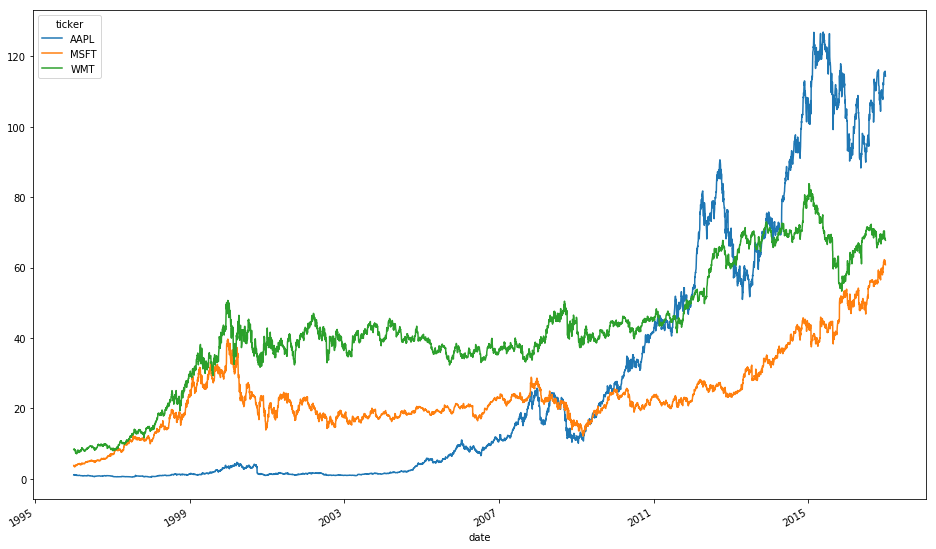

In [26]:
df.plot()

In [27]:
## correlation matrix

In [28]:
corrM = np.asmatrix(df.corr())
corrM

matrix([[ 1.        ,  0.8168485 ,  0.82408054],
        [ 0.8168485 ,  1.        ,  0.81128442],
        [ 0.82408054,  0.81128442,  1.        ]])

In [29]:
ones = np.array([[1 for x in range(len(df.columns))]])
ones

array([[1, 1, 1]])

In [88]:
## experiment with ready code

In [137]:
## chosen one 
#selected = ['CRK','NEM','FCX','VIAB','EGY','GIS','PPC','NTRI','PETS','MANH','PZZA','BIG','CPB','PM','MCD','FB','CORT','VECO','OLED','TSRO','ODP','GOLD']
# good one 30 - RRDiff 0.28
#selected = ['DYN', 'KORS', 'MCRI', 'SIGA', 'ECHO', 'TTMI', 'GILD', 'DECK', 'RECN', 'WOR', 'ASNA', 'CRIS', 'CBRE', 'LDL', 'PRU', 'TGH', 'IPXL', 'AMPE', 'KRA', 'HWCC', 'WRB', 'ENTA', 'AJG', 'GTT', 'BXC', 'GDOT', 'WDR', 'PQ', 'HSIC', 'OLED']
# good one 25 - RRDiff 0.239
#selected = ['MLR', 'PRAA', 'TISI', 'NYMT', 'DISCA', 'CBL', 'DWDP', 'NOV', 'CPLA', 'SIGA', 'CONN', 'SWKS', 'ADSK', 'FULT', 'SLCA']
selected = ['DYN', 'KORS', 'MCRI', 'SIGA', 'ECHO', 'TTMI', 'GILD', 'DECK', 'RECN', 'WOR', 'ASNA', 'CRIS', 'CBRE', 'LDL', 'PRU', 'TGH', 'AMPE', 'KRA', 'HWCC', 'WRB', 'ENTA', 'AJG', 'GTT', 'BXC', 'GDOT', 'WDR', 'HSIC', 'OLED']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '1999-1-1', 'lte': '2018-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.columns = table.columns.droplevel()
table.tail()

ticker        AJG  AMPE  ASNA    BXC   CBRE    CRIS   DECK    DYN   ECHO  \
date                                                                       
2018-03-21  70.27  2.58  2.06  33.38    NaN  0.8058  91.70  13.11  28.05   
2018-03-22  68.57  2.85  1.97  30.86  46.48  0.7611  90.48  13.22  28.30   
2018-03-23  66.69  2.93  1.91  30.70  45.22  0.7100  89.21  13.09  27.70   
2018-03-26  68.23  3.09  2.03  33.44  46.75  0.6801  90.98  13.47  27.85   
2018-03-27  67.53  3.11  2.03  30.96  46.68  0.6681  91.29  13.54  26.30   

ticker       ENTA  ...     MCRI    OLED     PRU   RECN  SIGA    TGH   TTMI  \
date               ...                                                       
2018-03-21  86.70  ...    43.22  114.95  108.88  16.55   NaN  19.00  16.65   
2018-03-22  83.07  ...    42.33  110.20  105.06  16.10   NaN  18.60  16.21   
2018-03-23  80.69  ...    41.13  105.25  100.64  15.85  5.91  17.60  15.48   
2018-03-26  86.90  ...    42.32  107.35  104.17  16.10  6.00  18.05  15.78   
2018-03-27  81.84  ...    42.01  105.30  102.56  15.85  6.03  16.80  15.45   

ticker        WDR    WOR    WRB  
date                             
2018-03-21  20.40  44.00  71.44  
2018-03-22  19.75  41.87  71.20  
2018-03-23  19.33  40.77  70.22  
2018-03-26  19.94  41.36  71.73  
2018-03-27  19.75  40.89  71.22  

[5 rows x 28 columns]

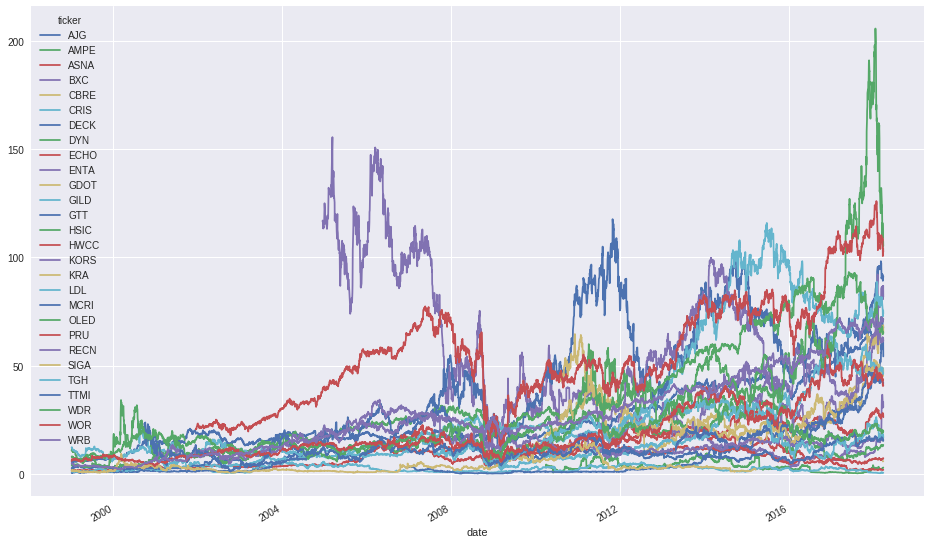

In [138]:
plt.rcParams['figure.figsize'] = (16.0, 10.0)
table.plot()

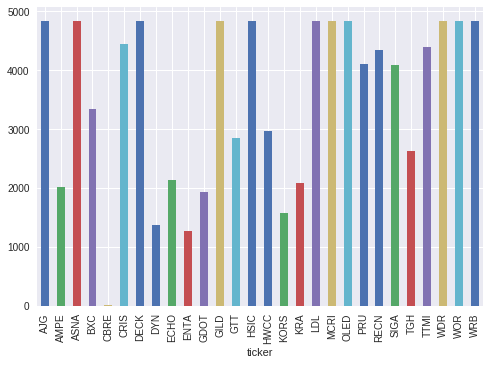

In [174]:
table.count().plot(kind="bar")

In [139]:
def calculate_portfolio(table, number_portfolios):
    selected = table.columns.values
    
    # calculate daily and annual returns of the stocks
    returns_daily = table.pct_change()
    returns_annual = returns_daily.mean() * 250

    # get daily and covariance of returns of the stock
    cov_daily = returns_daily.cov()
    cov_annual = cov_daily * 250

    # empty lists to store returns, volatility and weights of imiginary portfolios
    port_returns = []
    port_volatility = []
    port_return_risk_diff = []
    stock_weights = []

    # set the number of combinations for imaginary portfolios
    num_assets = len(selected)
    num_portfolios = number_portfolios

    # populate the empty lists with each portfolios returns,risk and weights
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, returns_annual)
        volatility = np.sqrt(abs(np.dot(weights.T, np.dot(cov_annual, weights))))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
        ## calculate max diff between return and risk
        port_return_risk_diff.append(returns-volatility)
        

    # a dictionary for Returns and Risk values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}

    # extend original dictionary to accomodate each ticker and weight in the portfolio
    for counter,symbol in enumerate(selected):
        portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

    
    for PRT, R, V in zip(stock_weights,port_returns, port_volatility):
        if R>0.3 and V<0.02:
            print "return:",R,"risk:",V
            print selected
            print np.round(PRT,5)
            #print 10000/table.iloc[-1].values*stock_weights,0
    
        
    ## plot only if risk lower than _pref_risk
    #if max(port_return_risk_diff)>0.02:

    # make a nice dataframe of the extended dictionary
    df = pd.DataFrame(portfolio)

    # get better labels for desired arrangement of columns
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

    # reorder dataframe columns
    df = df[column_order]

    # plot the efficient frontier with a scatter plot
    plt.style.use('seaborn')
    df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Efficient Frontier - # Assets:' + str(len(selected))+" - RRDiff:"+str(round(max(port_return_risk_diff),2))+" "+str(selected))
    plt.show()


return: 0.308413166744 risk: 0.0195200136362
[u'AJG' u'AMPE' u'ASNA' u'BXC' u'CBRE' u'CRIS' u'DECK' u'DYN' u'ECHO'
 u'ENTA' u'GDOT' u'GILD' u'GTT' u'HSIC' u'HWCC' u'KORS' u'KRA' u'LDL'
 u'MCRI' u'OLED' u'PRU' u'RECN' u'SIGA' u'TGH' u'TTMI' u'WDR' u'WOR' u'WRB']
[ 0.05717  0.0649   0.0162   0.03166  0.08035  0.00132  0.01601  0.04505
  0.04874  0.02976  0.04414  0.0127   0.00651  0.0515   0.06507  0.02577
  0.0149   0.06624  0.03608  0.05078  0.04515  0.02434  0.0838   0.02724
  0.01833  0.00192  0.00158  0.03279]
return: 0.311526488051 risk: 0.0139459830344
[u'AJG' u'AMPE' u'ASNA' u'BXC' u'CBRE' u'CRIS' u'DECK' u'DYN' u'ECHO'
 u'ENTA' u'GDOT' u'GILD' u'GTT' u'HSIC' u'HWCC' u'KORS' u'KRA' u'LDL'
 u'MCRI' u'OLED' u'PRU' u'RECN' u'SIGA' u'TGH' u'TTMI' u'WDR' u'WOR' u'WRB']
[  5.17100000e-02   3.70300000e-02   3.00000000e-05   3.00000000e-05
   7.66400000e-02   4.17000000e-03   5.72800000e-02   2.08600000e-02
   1.76000000e-03   4.24500000e-02   2.86200000e-02   1.57700000e-02
   4.6130000

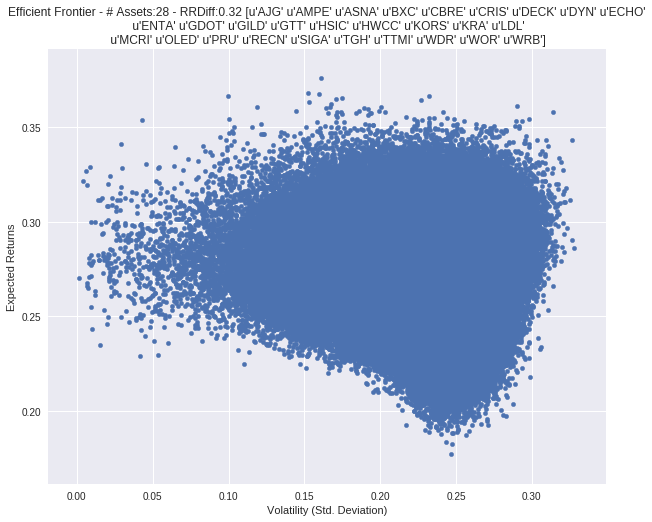

In [140]:
calculate_portfolio(table,600000)

In [114]:
## get current value

In [153]:
assets = table.columns.values

In [175]:
prt_allocation_pct = np.round([ 0.02611,  0.02875,  0.03516,  0.00568,  0.07276,  0.02314,  0.05738,  0.00188,
  0.05361,  0.00779,  0.03783,  0.07764,  0.07964,  0.043,    0.03187,  0.04661,
  0.0419,   0.05116,  0.02234,  0.04468,  0.01345,  0.01716,  0.08374,  0.01113,
  0.02673,  0.01789,  0.03954,  0.00141],4)

In [176]:
allocations = (33000/np.round(table.iloc[-1].values,3)*prt_allocation_pct).astype(int)
print allocations

[  12  305  572    6   51 1141   20    4   67    3   19   34   48   21  142
   25   29   36   17   14    4   35  458   21   57   29   31    0]


In [155]:
current_price = np.round(table.iloc[-1].values,4)

In [156]:
df = pd.DataFrame({'assets':assets, 'alloc':allocations, 'price':current_price})
df

alloc assets     price
0      12    AJG   67.5300
1     305   AMPE    3.1100
2     572   ASNA    2.0300
3       6    BXC   30.9600
4      51   CBRE   46.6800
5    1141   CRIS    0.6681
6      20   DECK   91.2900
7       4    DYN   13.5400
8      67   ECHO   26.3000
9       3   ENTA   81.8400
10     19   GDOT   65.1500
11     34   GILD   74.1100
12     48    GTT   54.3500
13     21   HSIC   65.0800
14    142   HWCC    7.4000
15     25   KORS   61.5100
16     29    KRA   47.3700
17     36    LDL   46.7500
18     17   MCRI   42.0100
19     14   OLED  105.3000
20      4    PRU  102.5600
21     35   RECN   15.8500
22    458   SIGA    6.0300
23     21    TGH   16.8000
24     57   TTMI   15.4500
25     29    WDR   19.7500
26     31    WOR   40.8900
27      0    WRB   71.2200

### generate all possible stock combinations to find minimum risk and max return

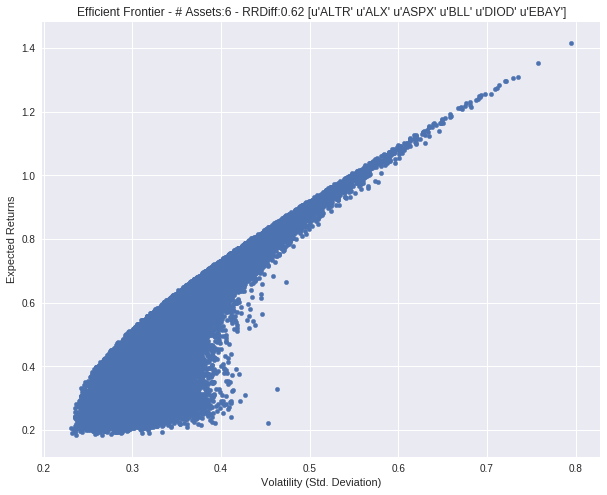

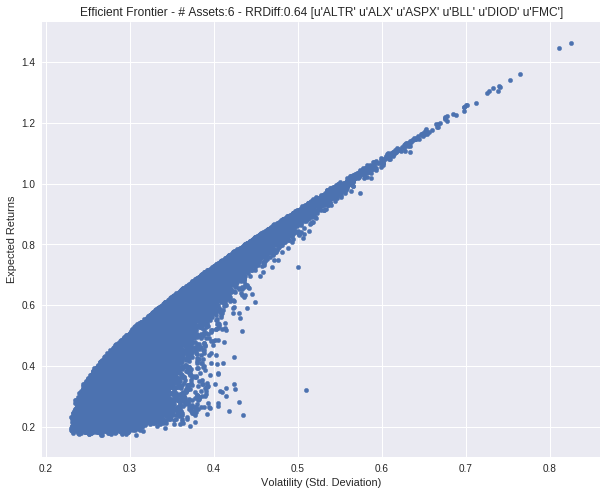

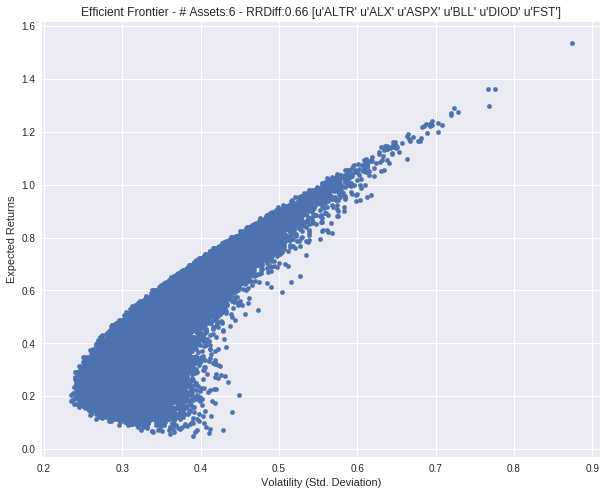

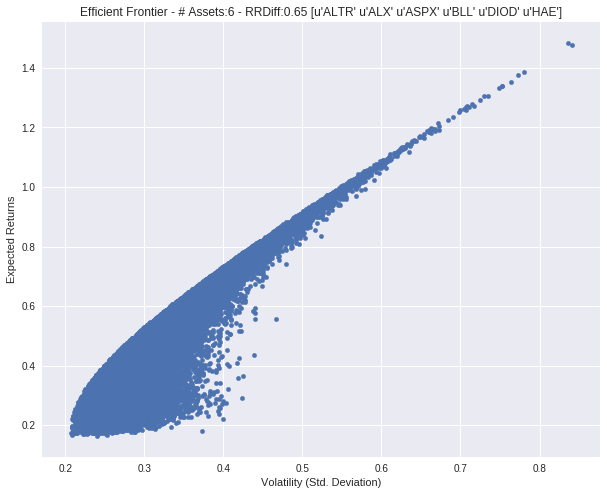

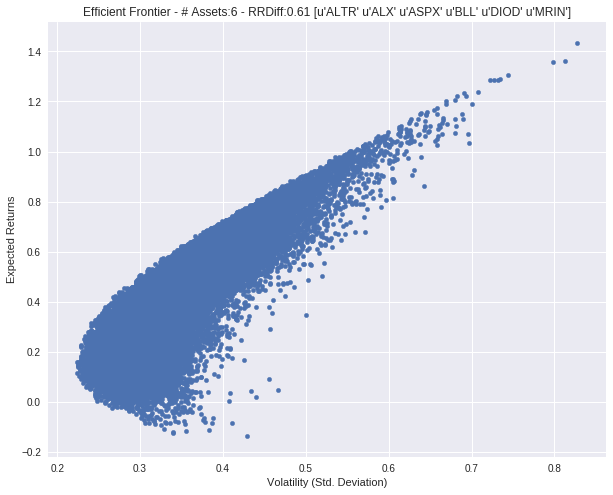

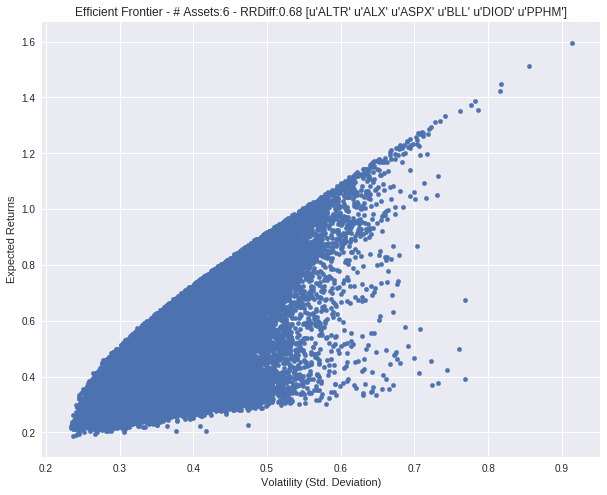

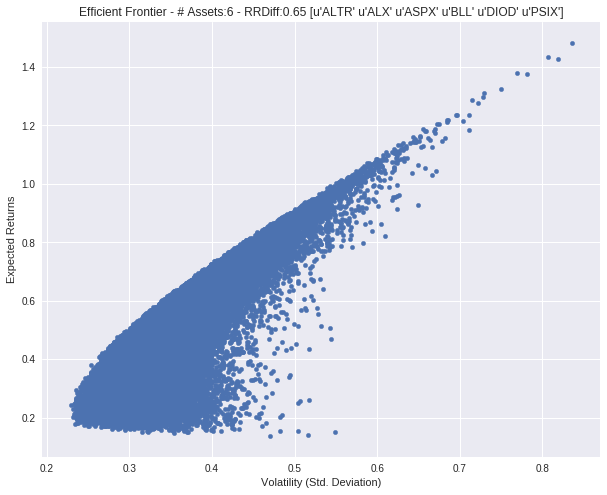

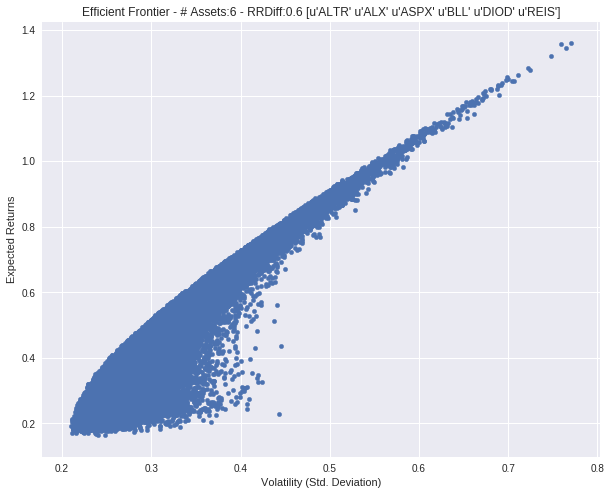

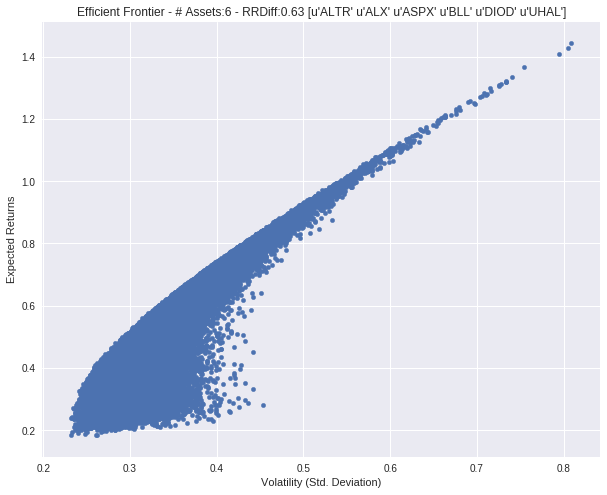

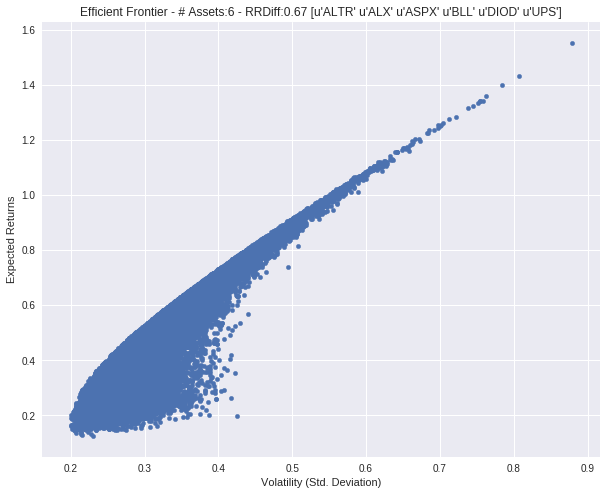

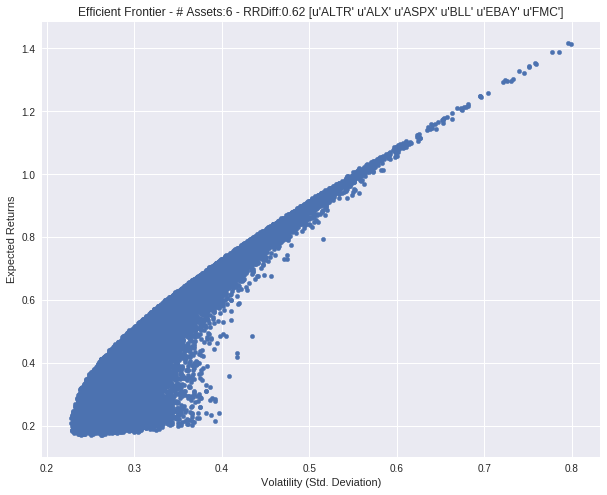

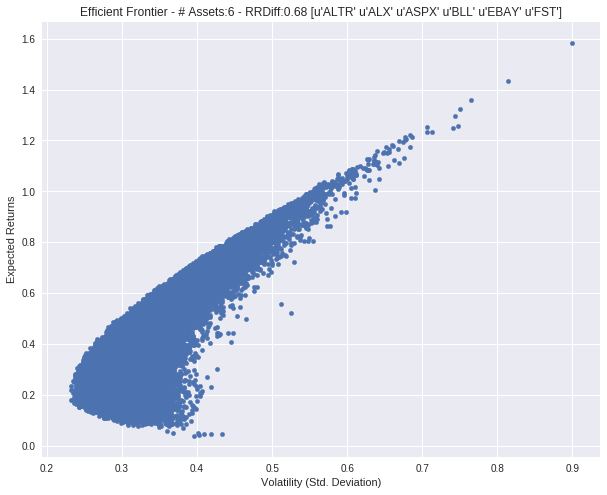

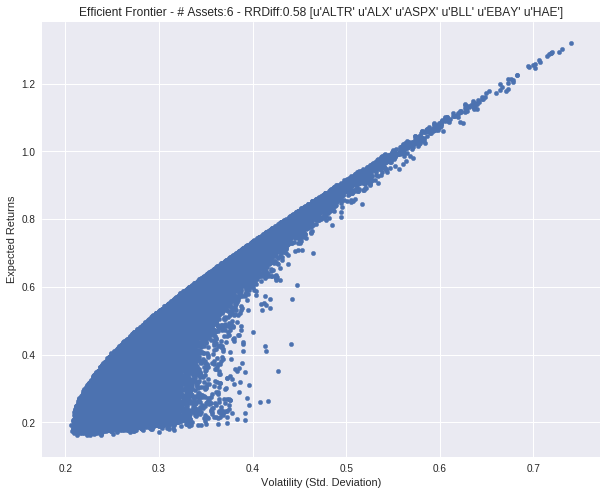

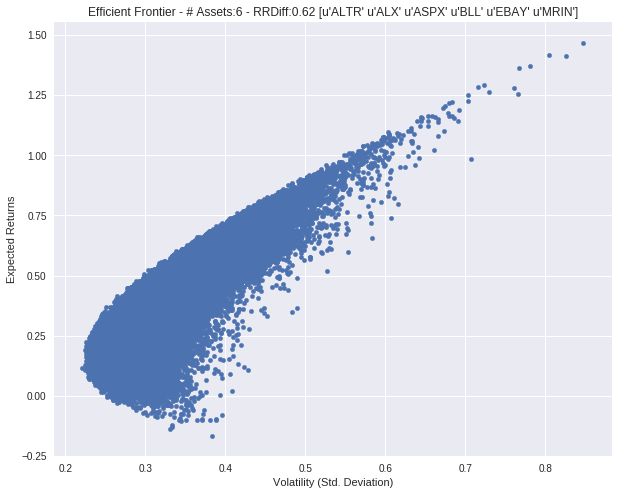

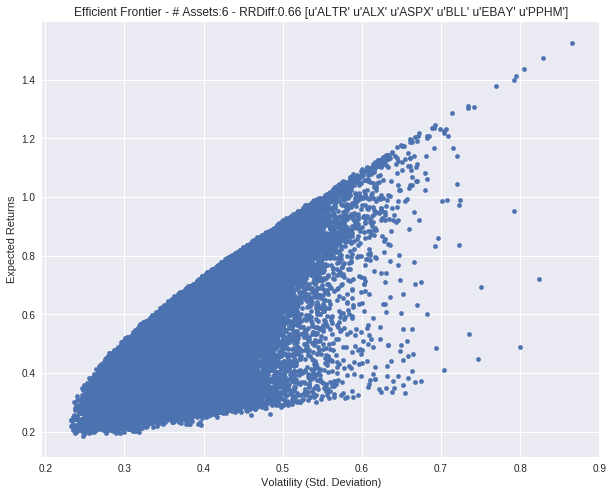

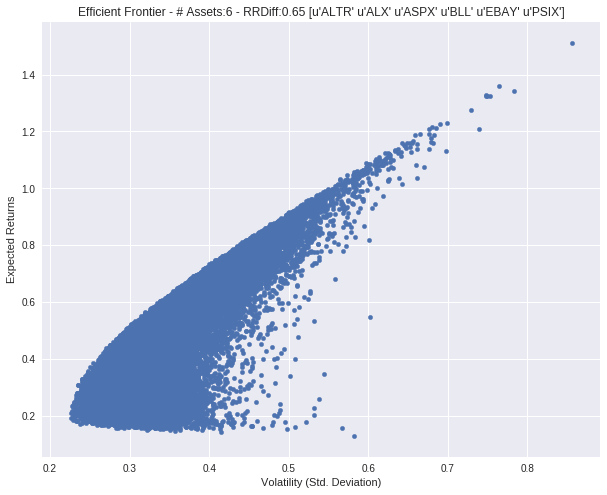

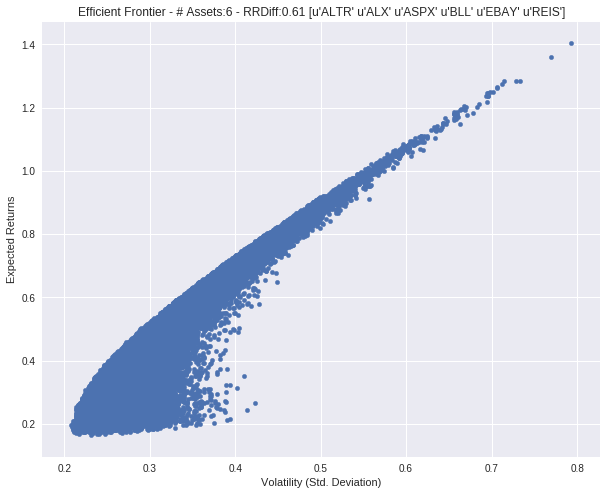

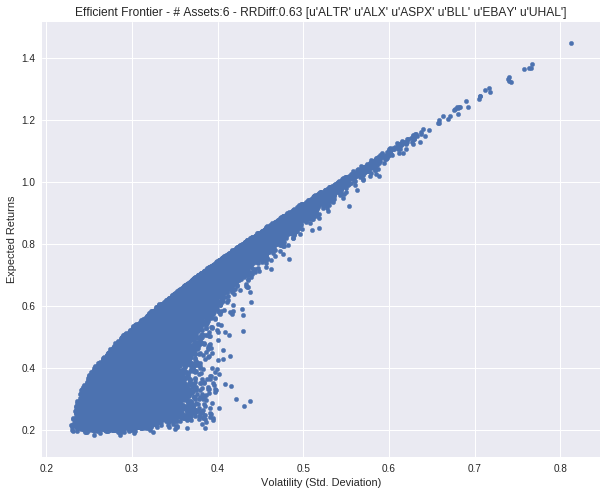

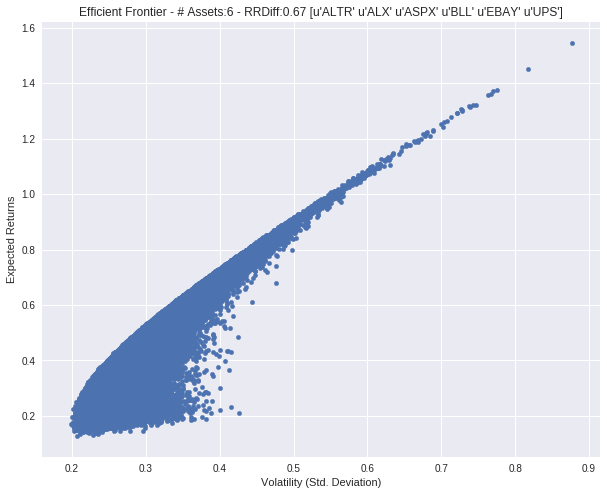

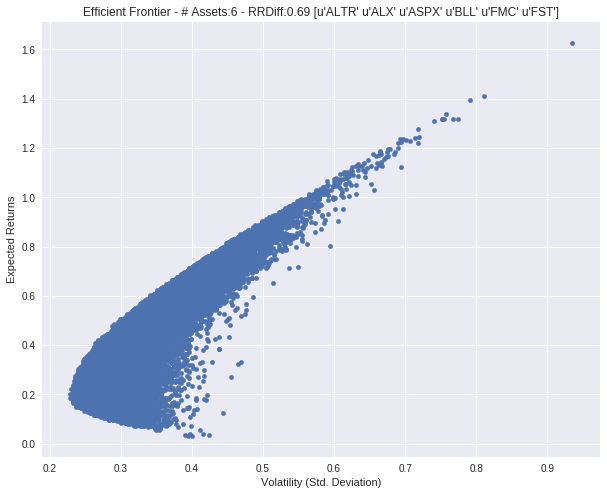

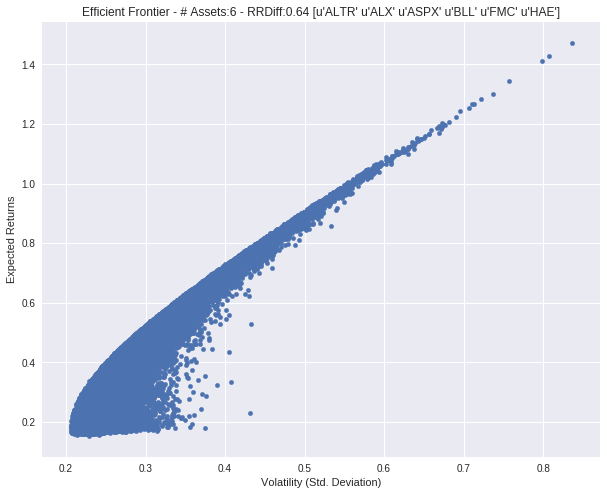

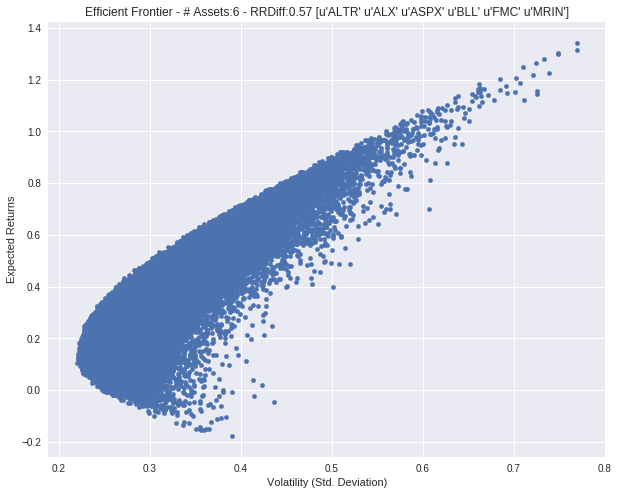

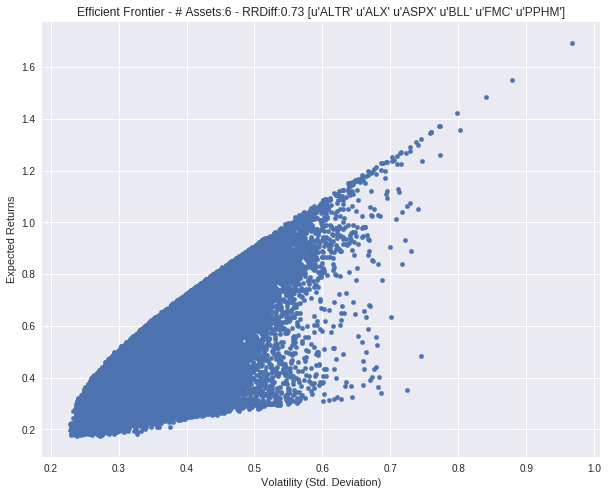

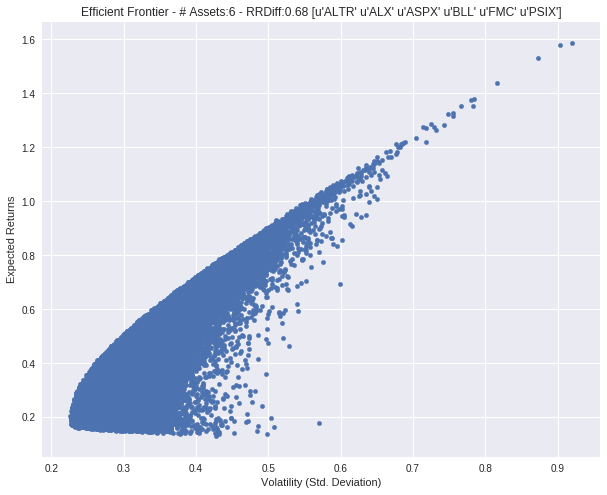

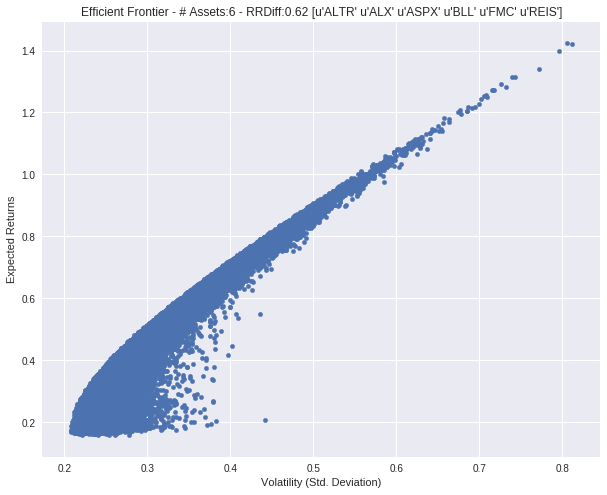

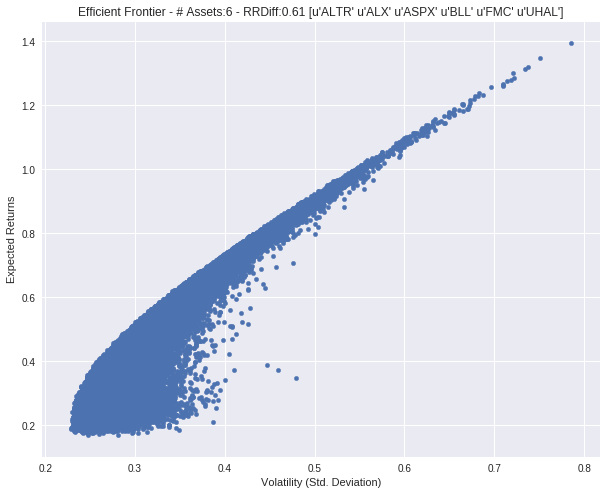

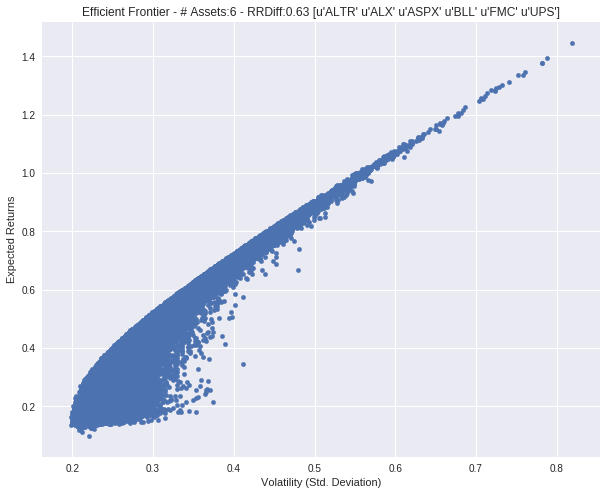

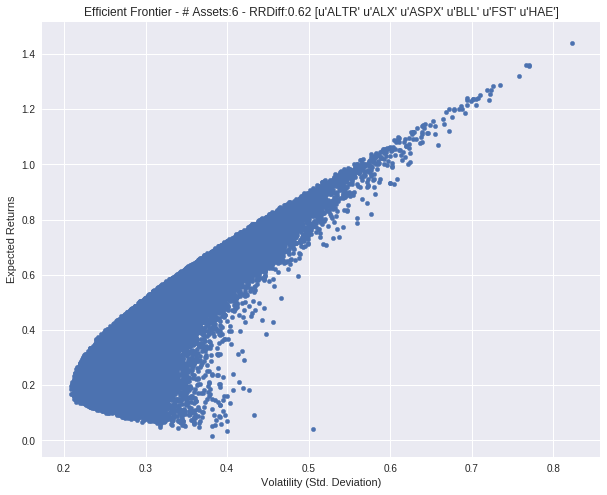

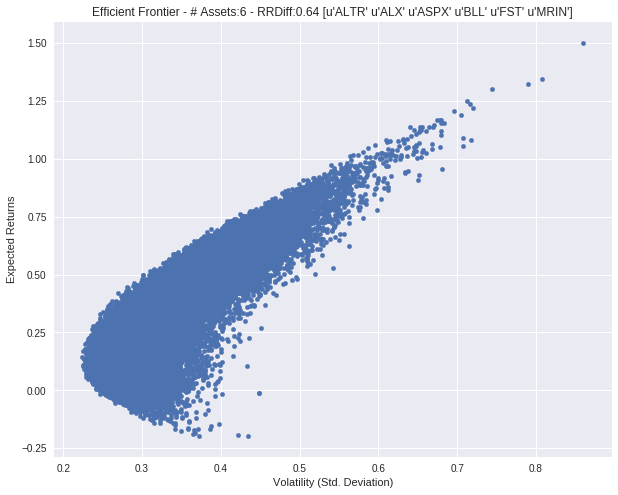

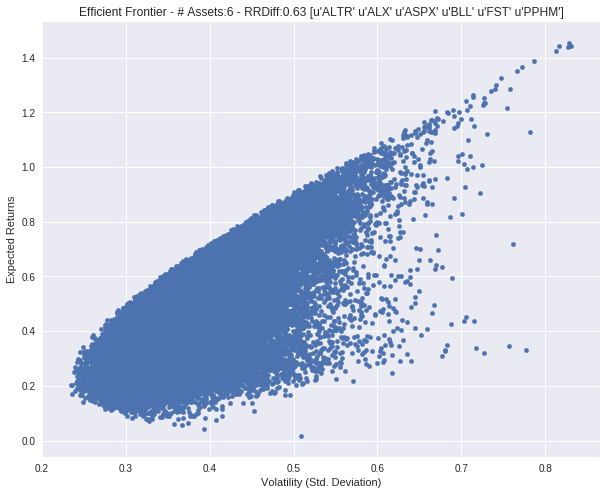

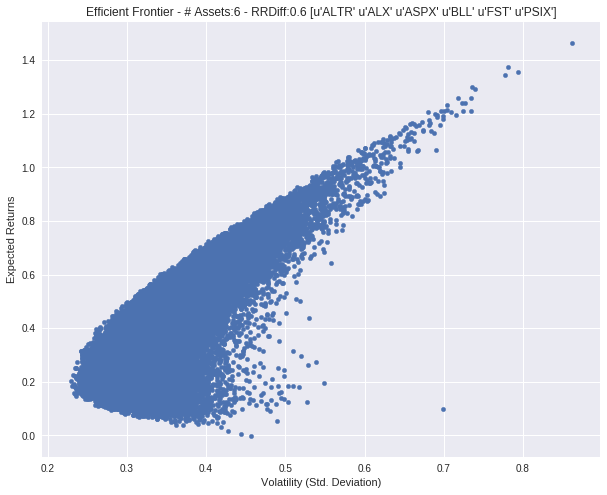

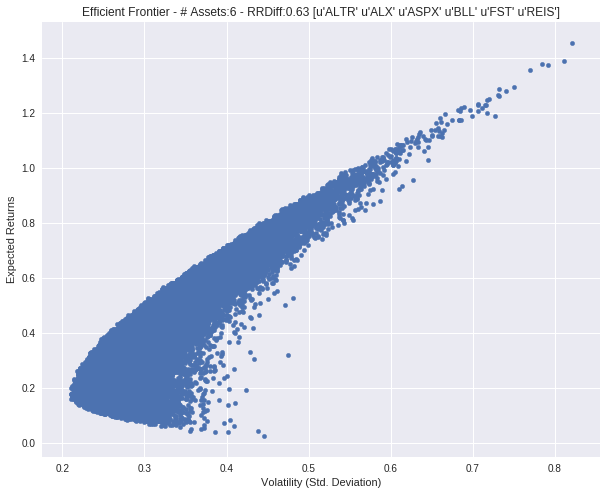

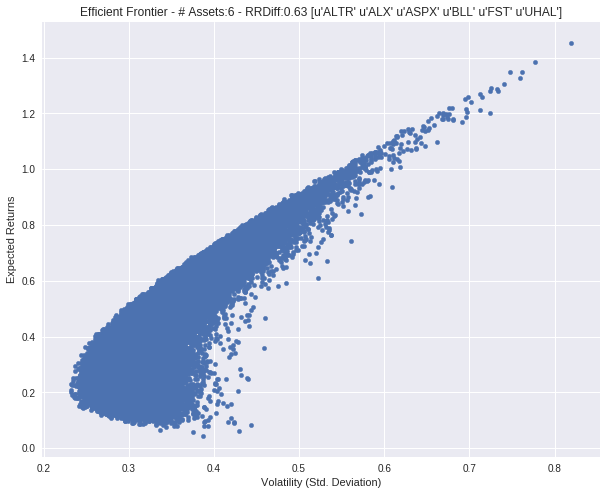

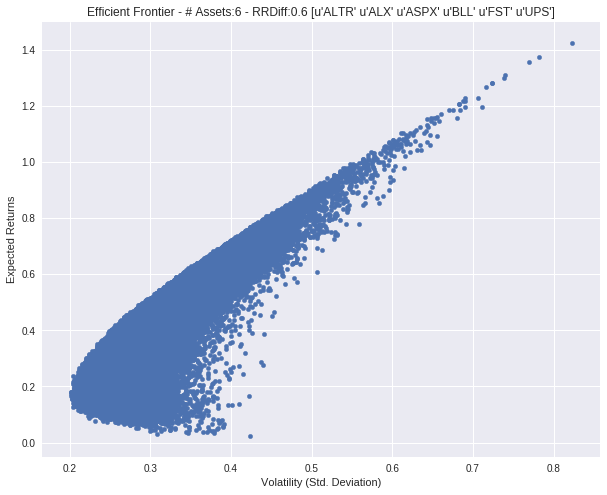

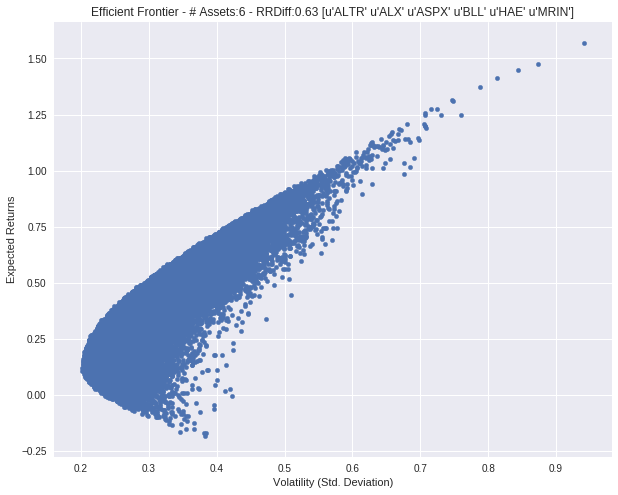

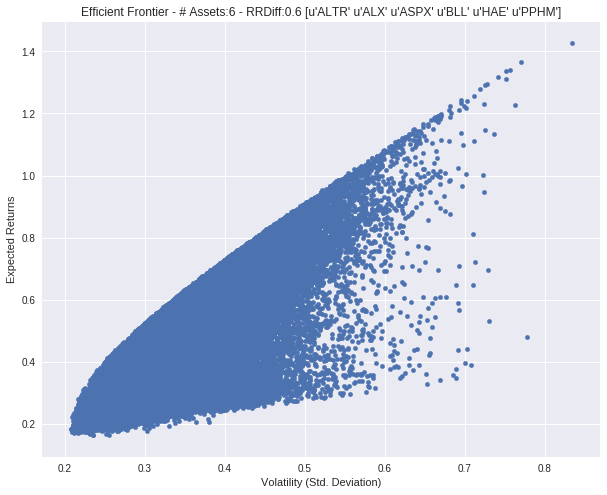

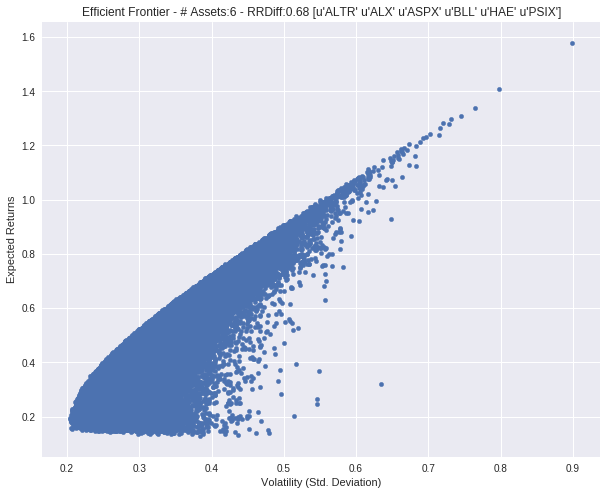

return: 0.220614772541 risk: 0.198371860316
return: 0.227944792431 risk: 0.199670896189
return: 0.222895834551 risk: 0.199237018175
return: 0.222470385082 risk: 0.197931886829
return: 0.224255480783 risk: 0.19977712375
return: 0.234154828457 risk: 0.199547486697
return: 0.222162045094 risk: 0.196246530656
return: 0.233128865116 risk: 0.198032546285
return: 0.227337305956 risk: 0.198419823743
return: 0.226896819092 risk: 0.199502036252
return: 0.238114001213 risk: 0.199711469956
return: 0.236112827622 risk: 0.199435754516
return: 0.239454945736 risk: 0.199910234888
return: 0.23069812759 risk: 0.199924579434
return: 0.221737337753 risk: 0.199391410769
return: 0.236505341645 risk: 0.199514510168
return: 0.221155609779 risk: 0.19913748162


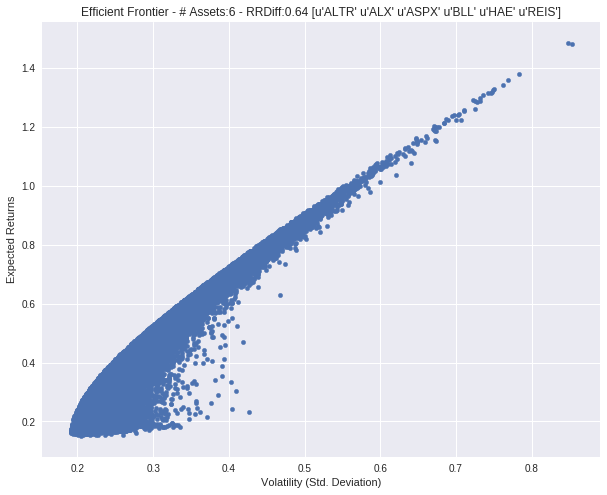

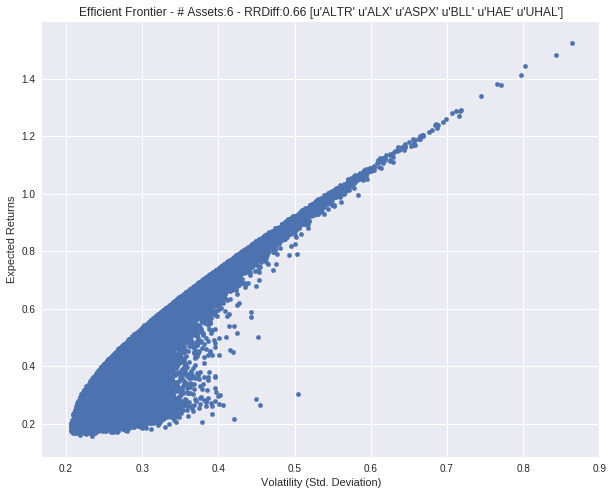

return: 0.232206992841 risk: 0.197382714164
return: 0.223955361919 risk: 0.198462266468
return: 0.232907077781 risk: 0.197163375307
return: 0.231887489286 risk: 0.19835955038
return: 0.238947390531 risk: 0.199929001957
return: 0.233103232831 risk: 0.197870648022
return: 0.232127675481 risk: 0.19895172326
return: 0.23796222384 risk: 0.198249346217
return: 0.227355253061 risk: 0.199727920451
return: 0.228482694769 risk: 0.197496855767
return: 0.240765142959 risk: 0.197793487019
return: 0.245242943523 risk: 0.199212460453
return: 0.242111740209 risk: 0.199087166023
return: 0.225567887407 risk: 0.197594309396
return: 0.238622587314 risk: 0.198077435228
return: 0.24964105911 risk: 0.199553623336
return: 0.246858629089 risk: 0.197782295742
return: 0.231432511238 risk: 0.197933795627
return: 0.22761919278 risk: 0.194057607168
return: 0.251470541739 risk: 0.199455838621
return: 0.221140008583 risk: 0.197724322445
return: 0.228473174239 risk: 0.196050747613
return: 0.232231375158 risk: 0.196512

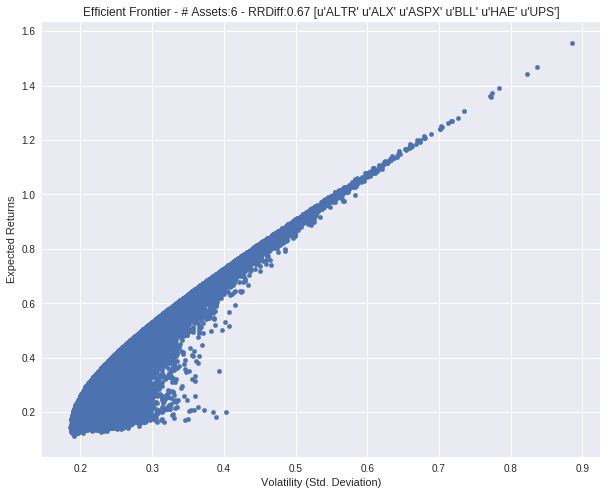

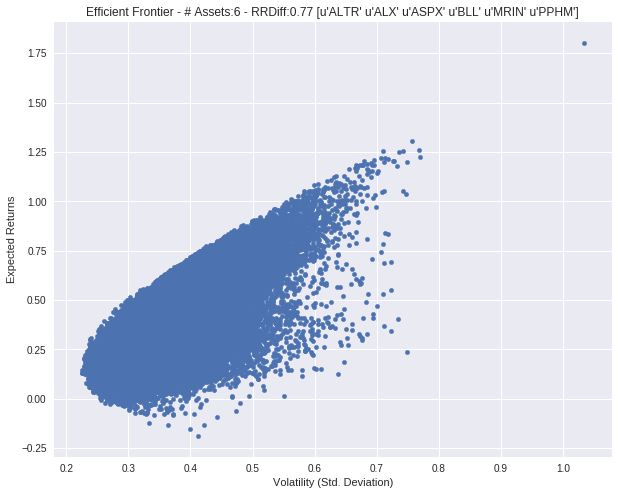

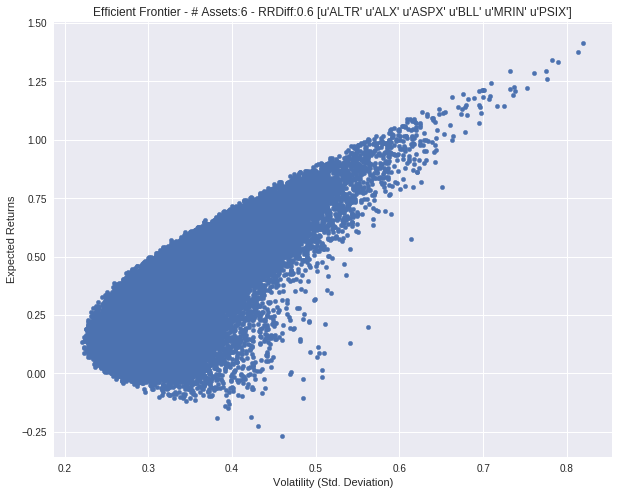

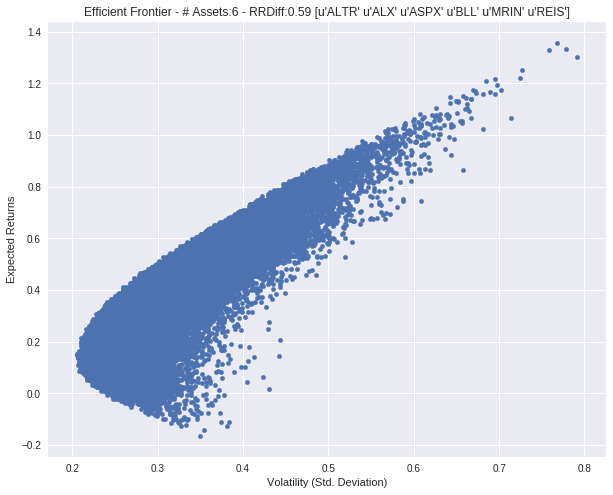

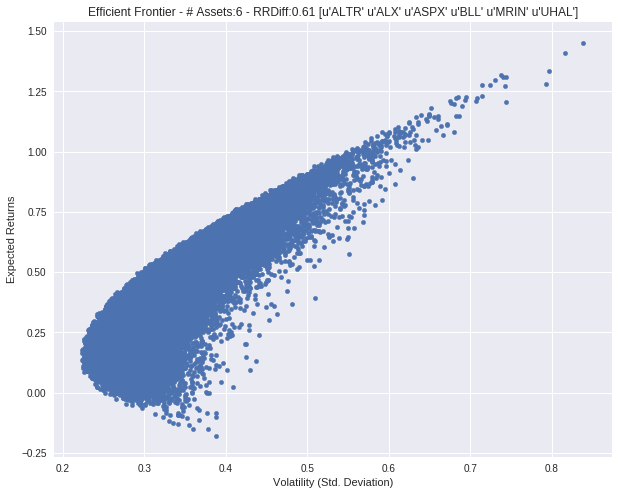

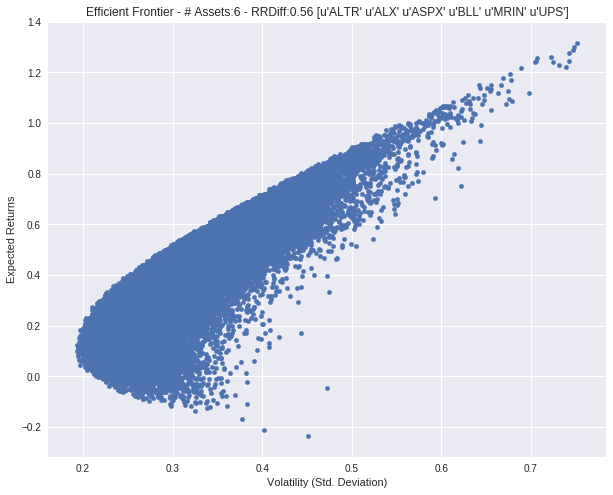

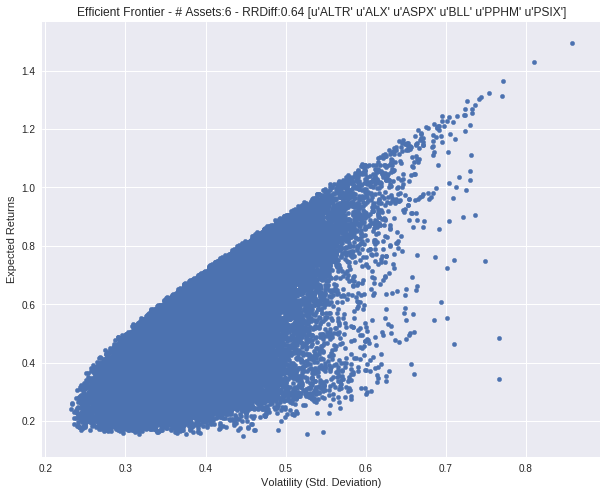

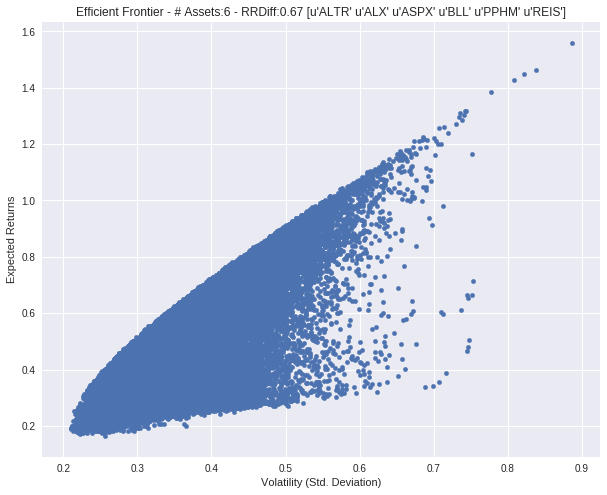

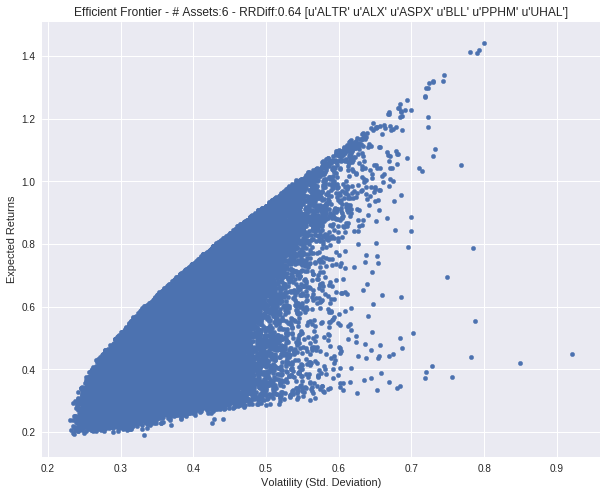

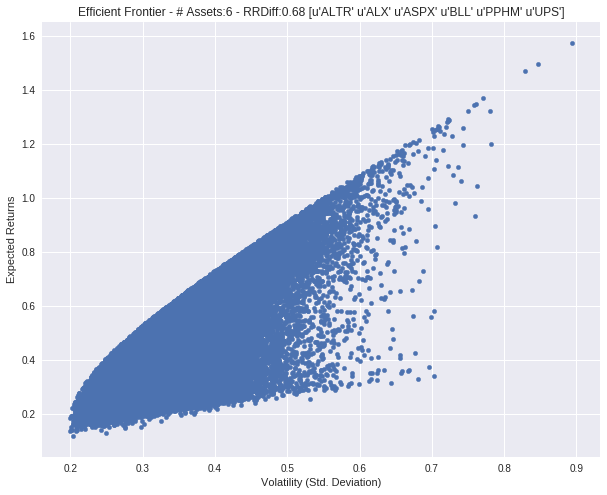

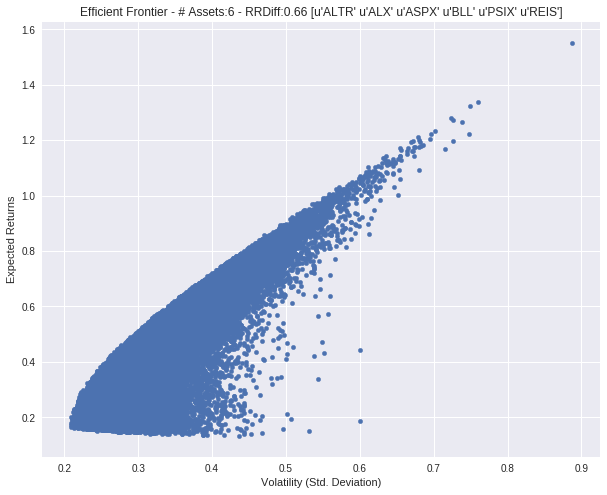

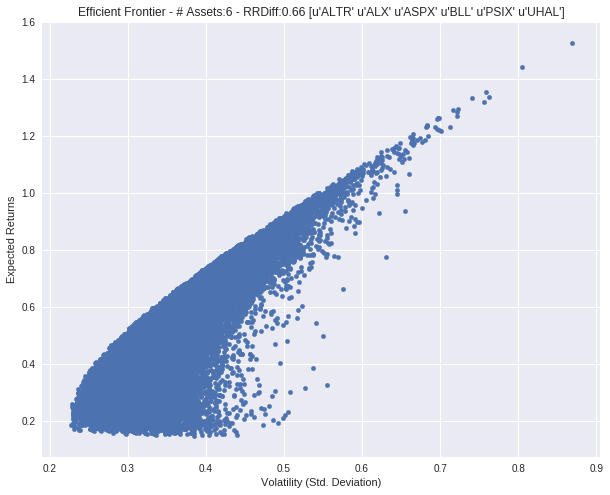

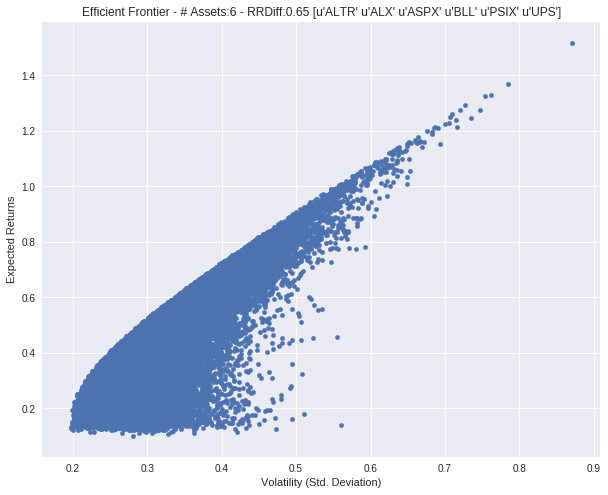

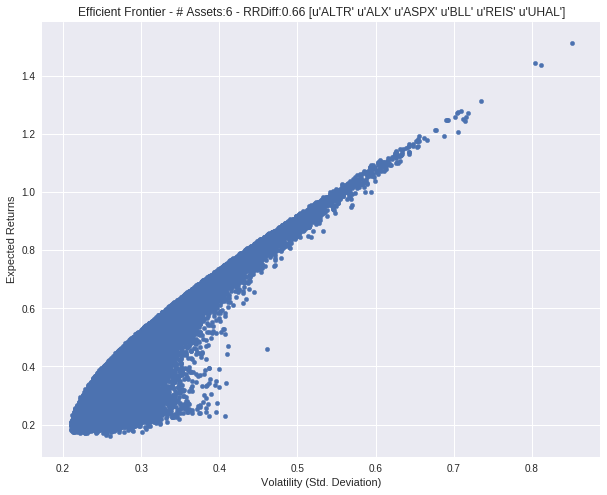

return: 0.232245670004 risk: 0.196710006682
return: 0.226375851745 risk: 0.197148617127
return: 0.220080588172 risk: 0.1986807258
return: 0.221131219809 risk: 0.199752536926
return: 0.226414604862 risk: 0.198102315422
return: 0.223435901455 risk: 0.197181196588
return: 0.235281531098 risk: 0.196563238657
return: 0.235485540146 risk: 0.198919109319
return: 0.245644220894 risk: 0.196958433592
return: 0.242748315098 risk: 0.198933100667
return: 0.239320313078 risk: 0.19879525187
return: 0.240524968714 risk: 0.198723518849
return: 0.223101647614 risk: 0.197032167783
return: 0.227677083854 risk: 0.198794286057
return: 0.245108017429 risk: 0.19973332546
return: 0.230972820185 risk: 0.196993278532
return: 0.243424813051 risk: 0.199026282213
return: 0.234947418965 risk: 0.198819669961
return: 0.237305600408 risk: 0.198025752607
return: 0.228736333154 risk: 0.199669020142
return: 0.223141214335 risk: 0.196855500133
return: 0.227974292721 risk: 0.198807242034
return: 0.220792049348 risk: 0.19471

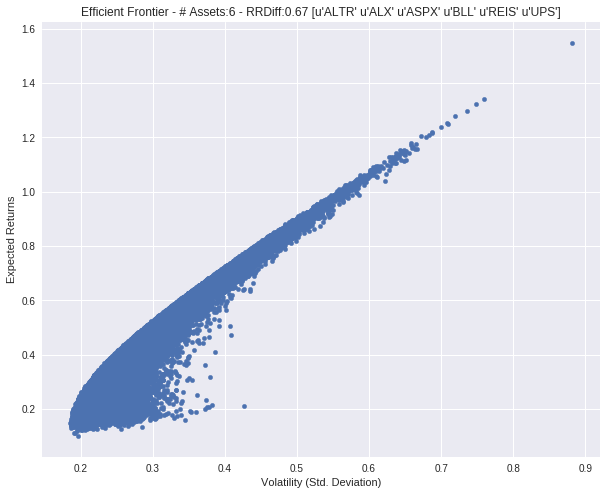

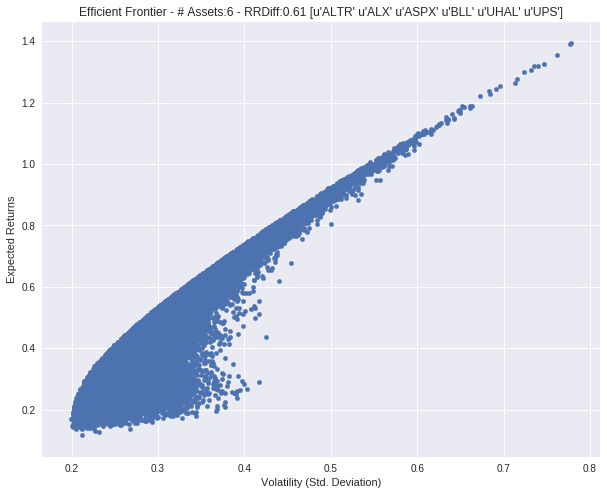

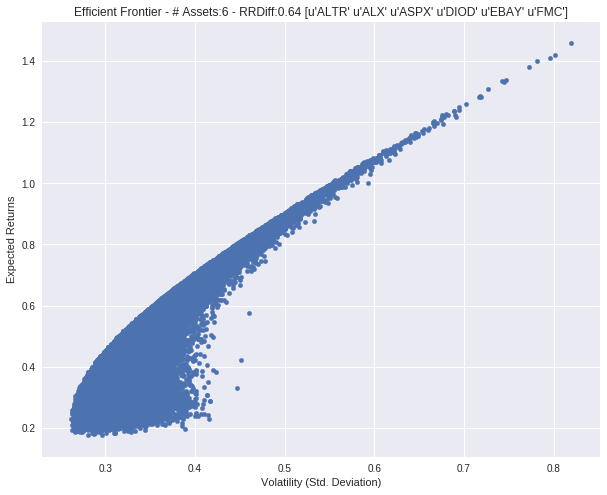

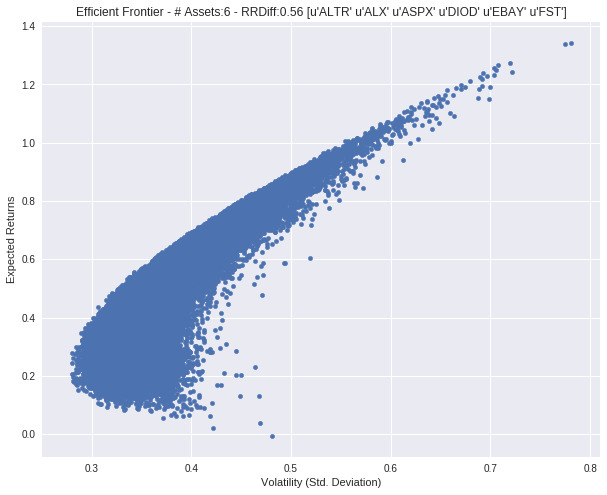

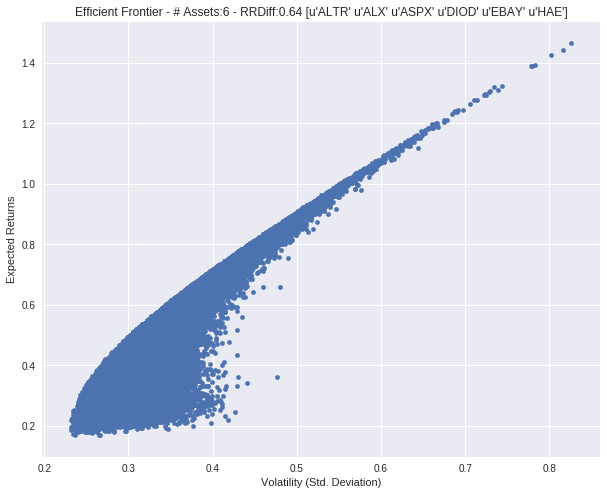

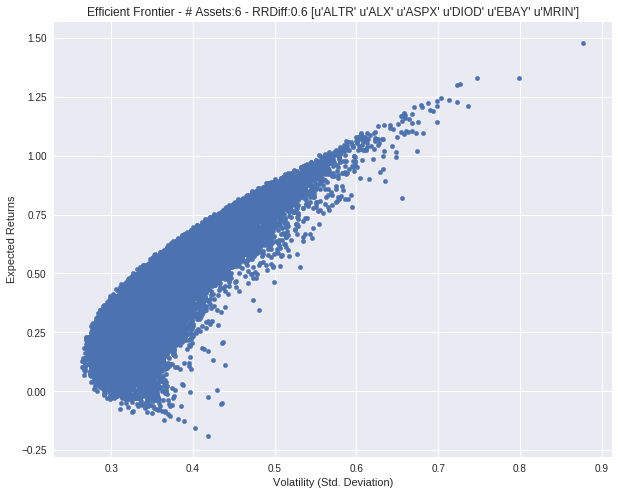

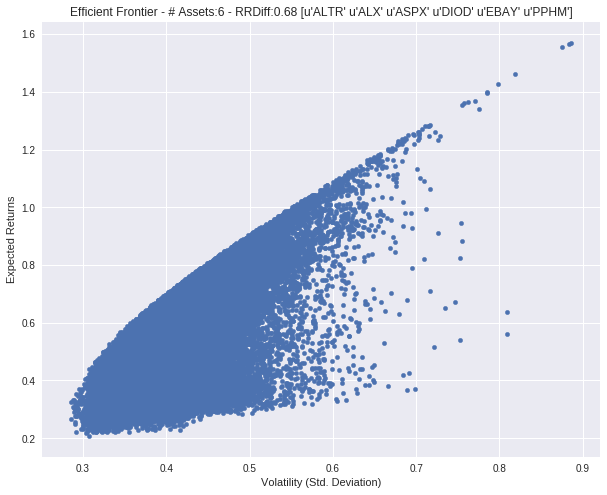

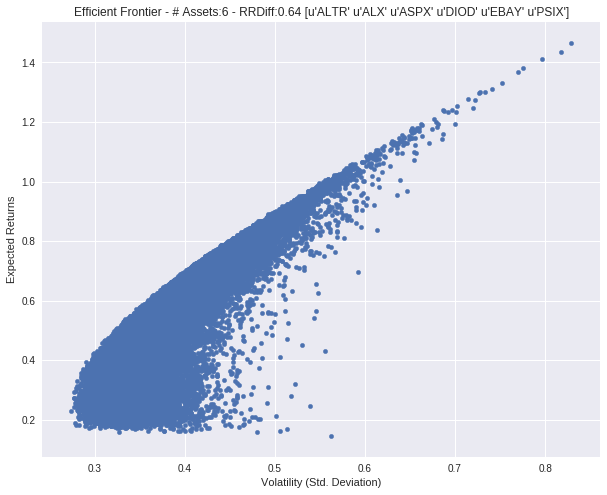

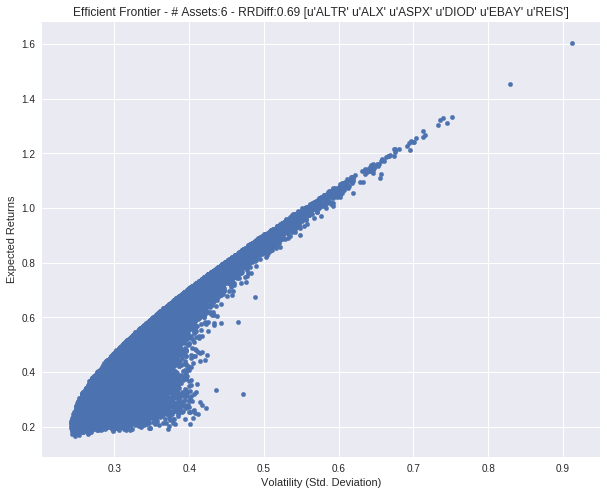

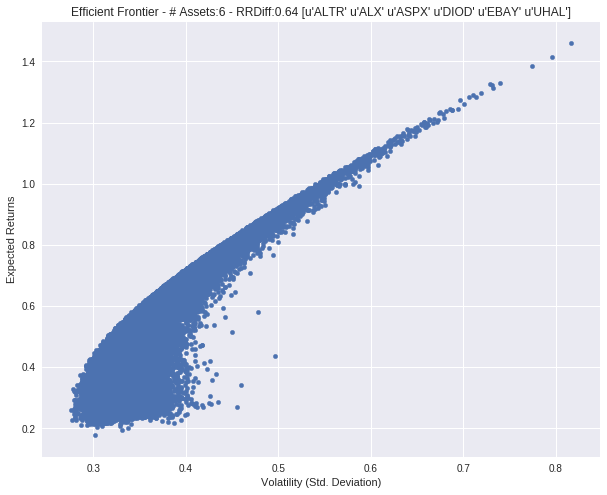

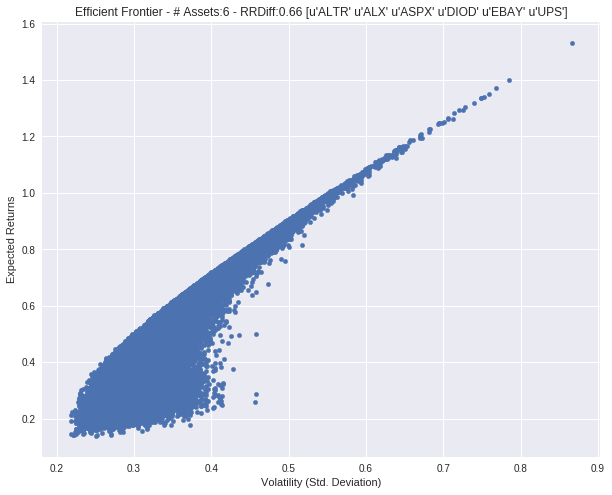

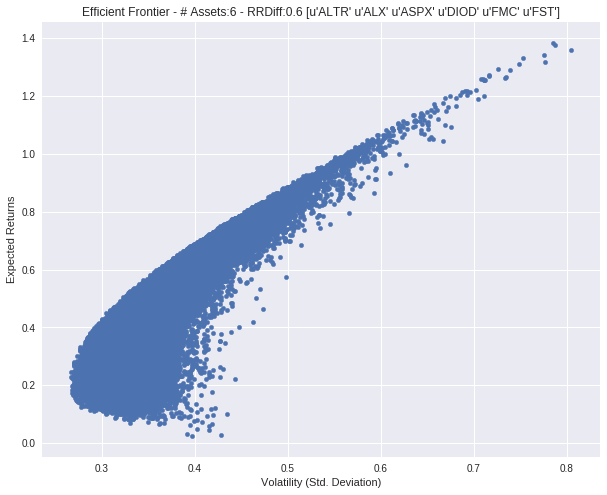

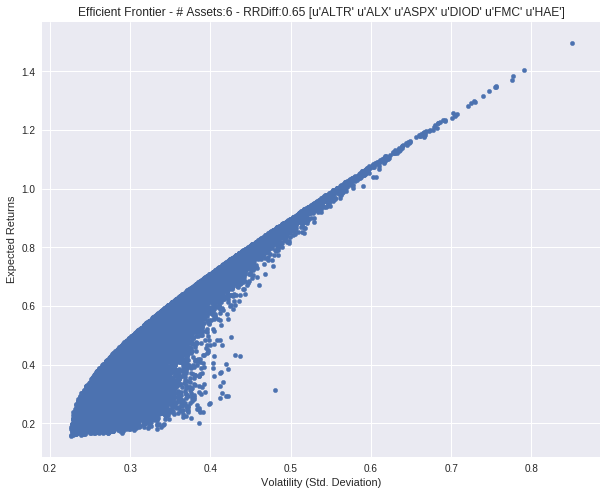

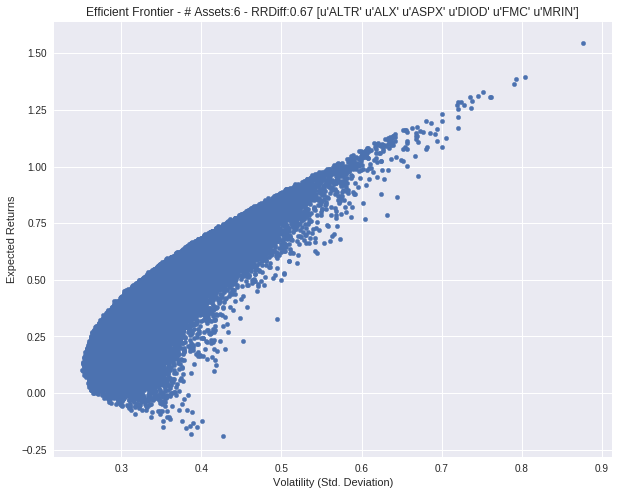

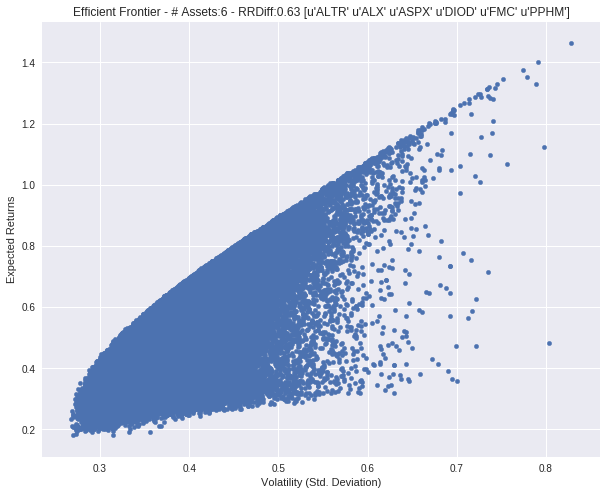

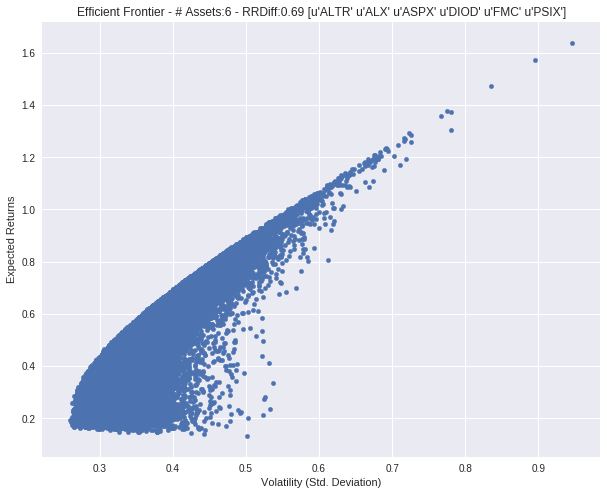

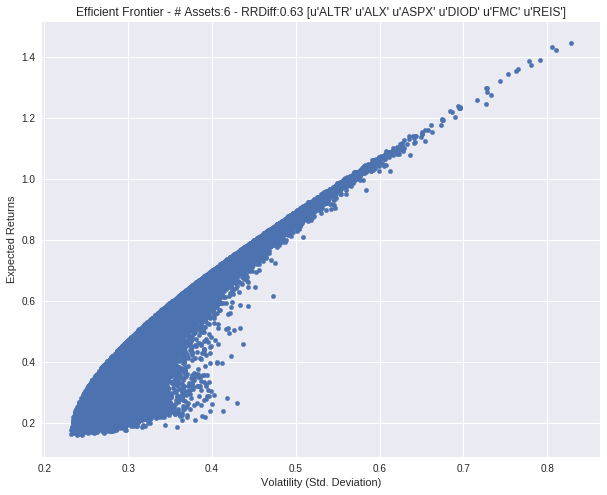

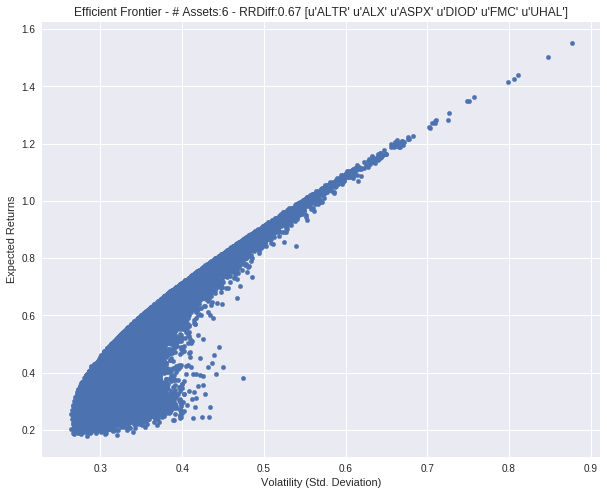

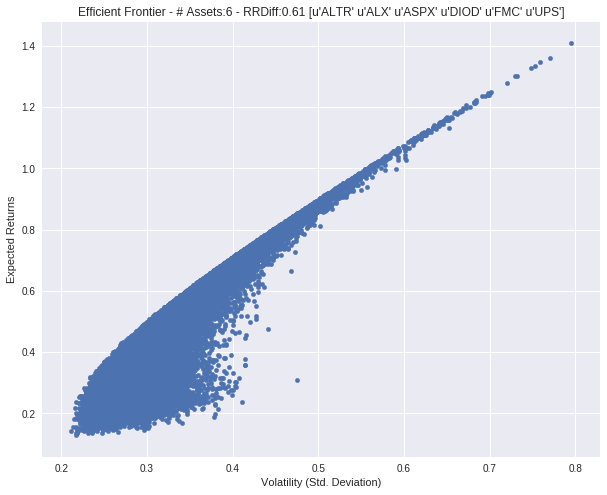

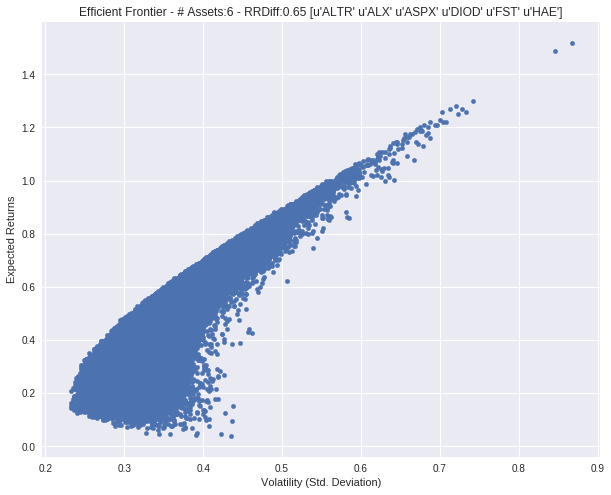

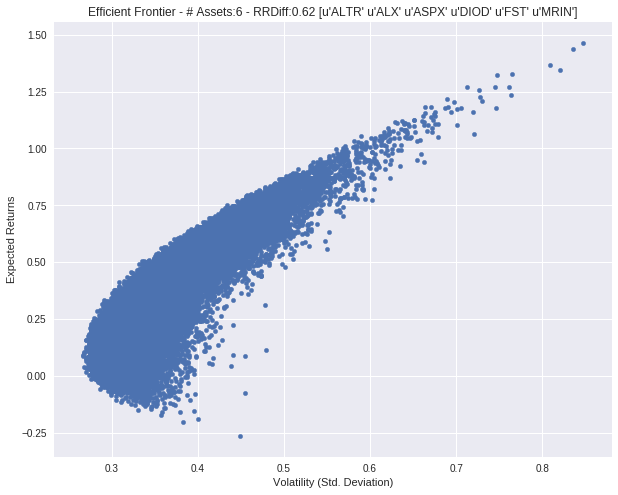

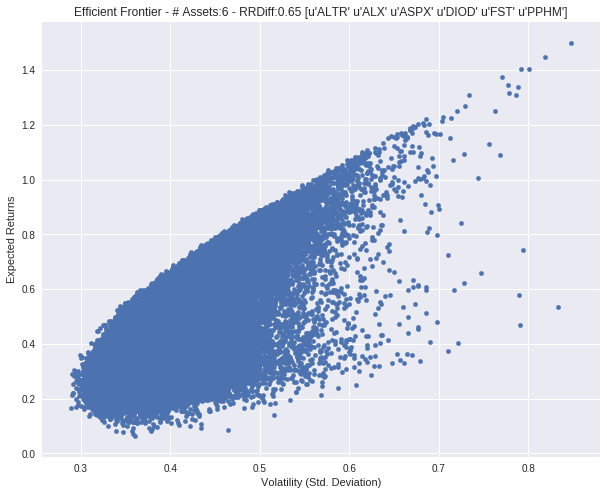

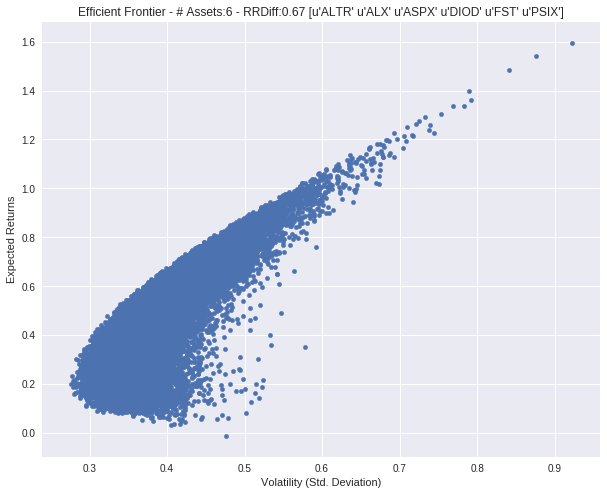

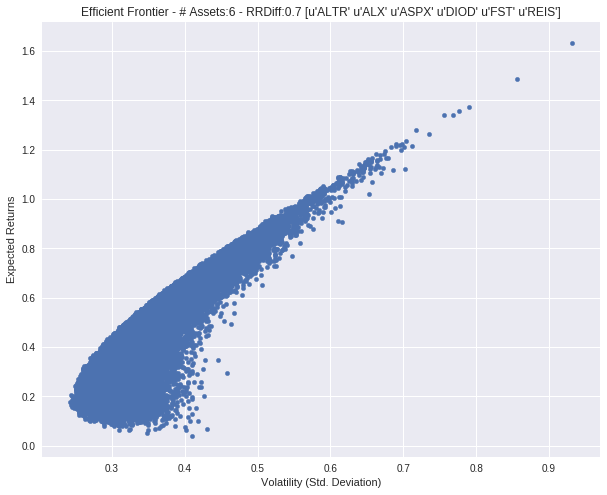

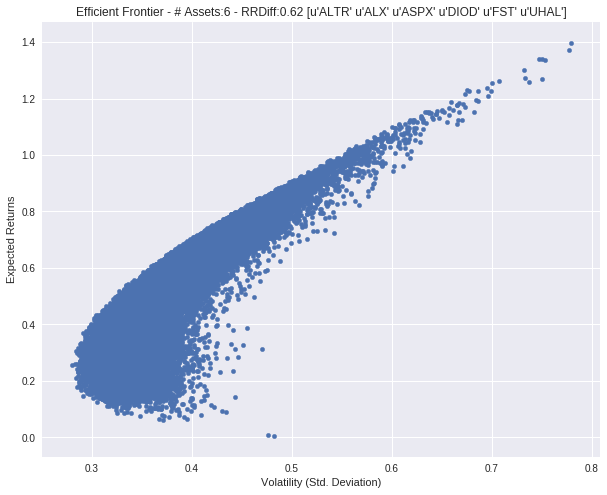

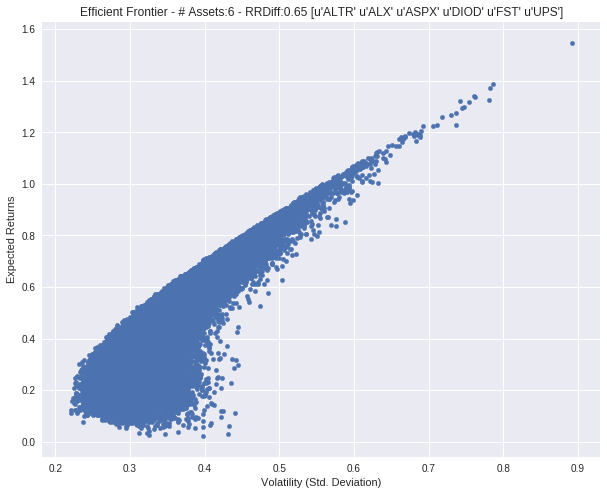

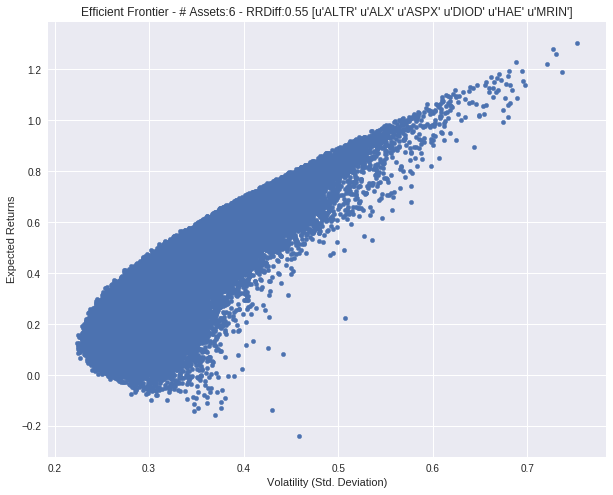

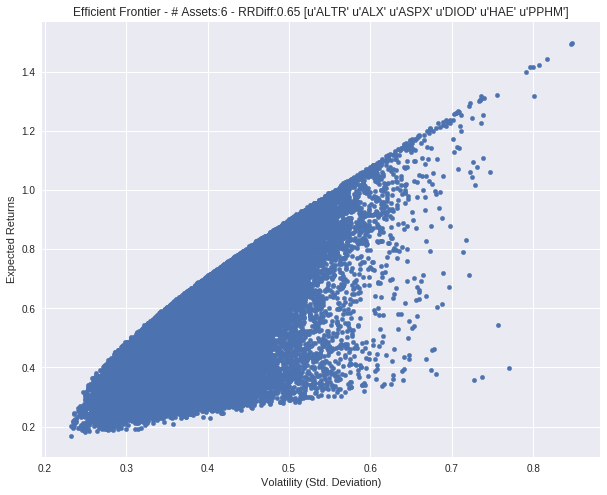

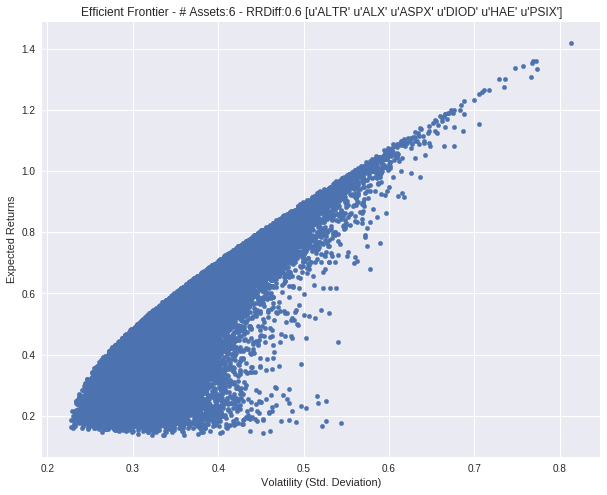

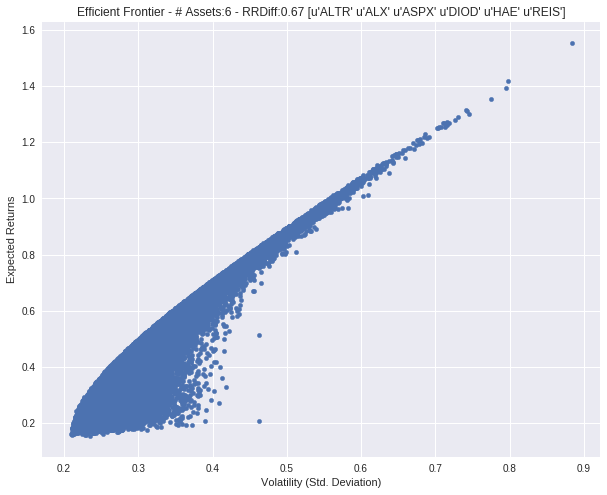

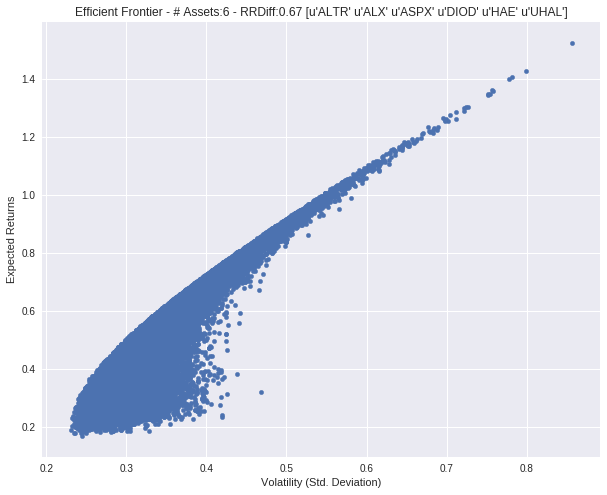

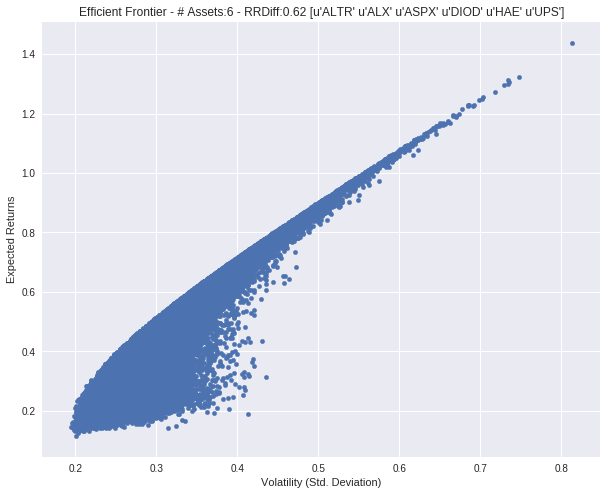

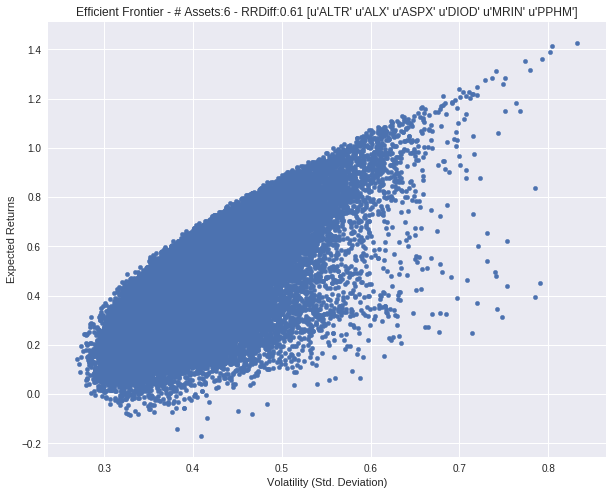

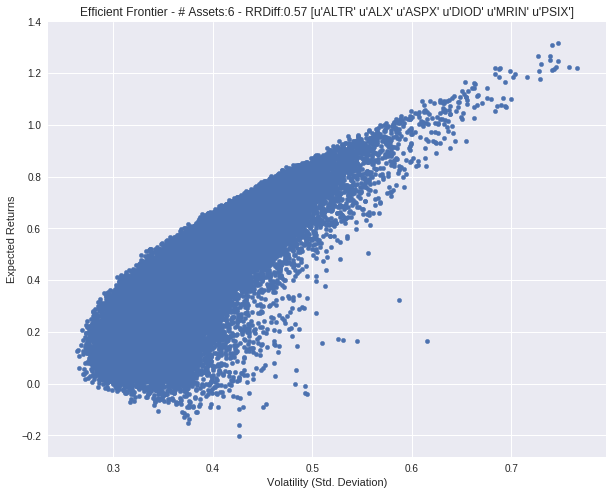

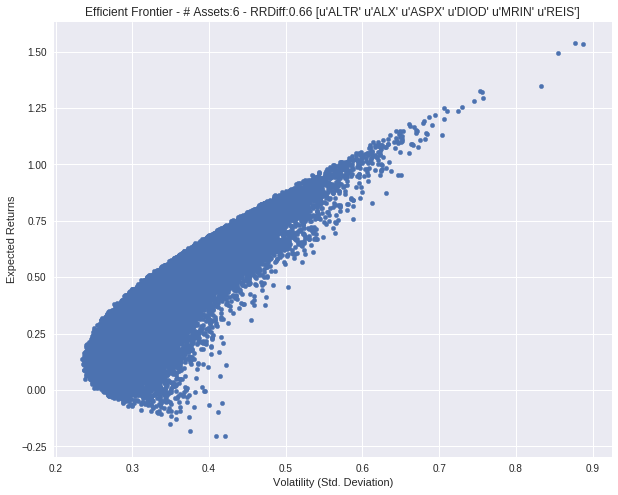

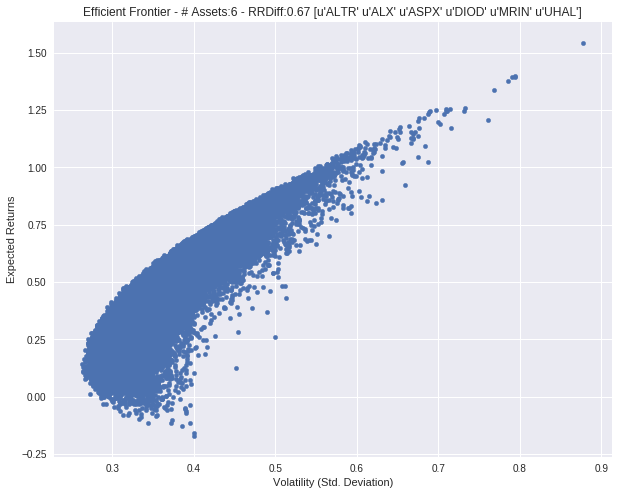

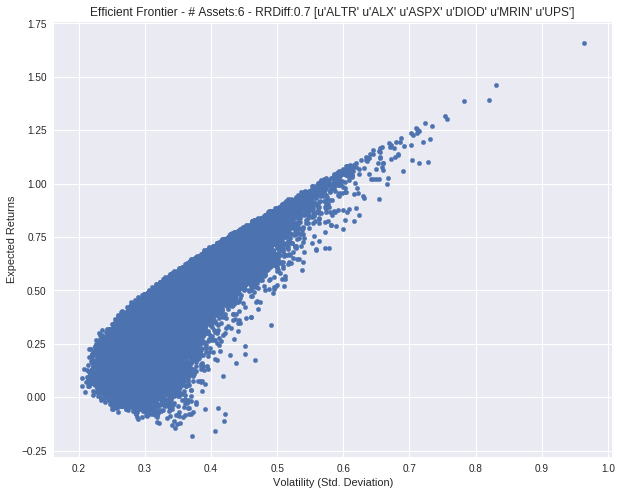

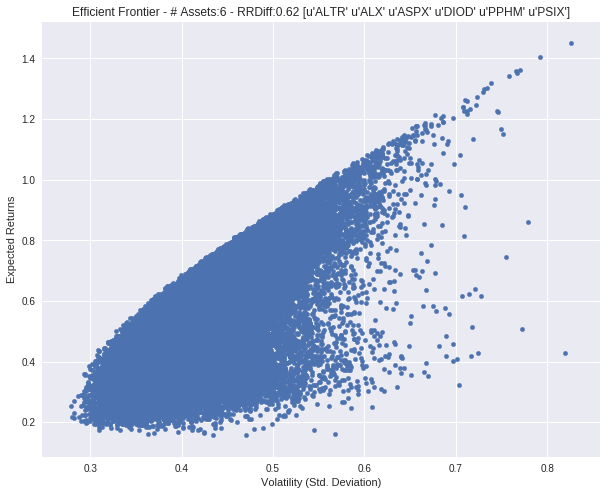

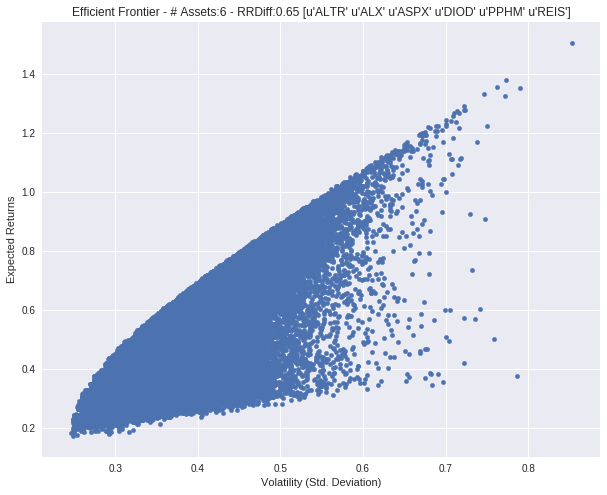

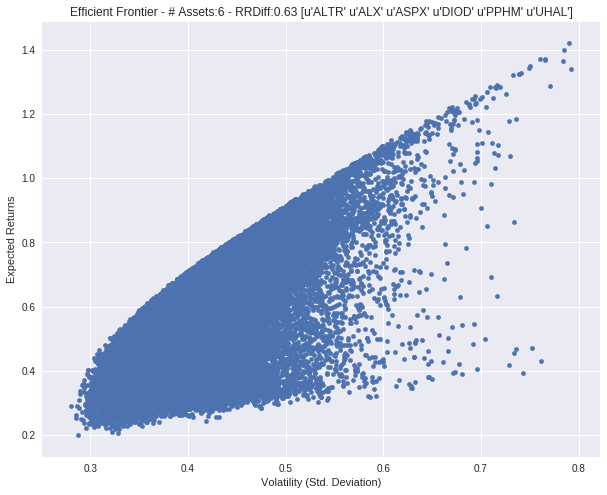

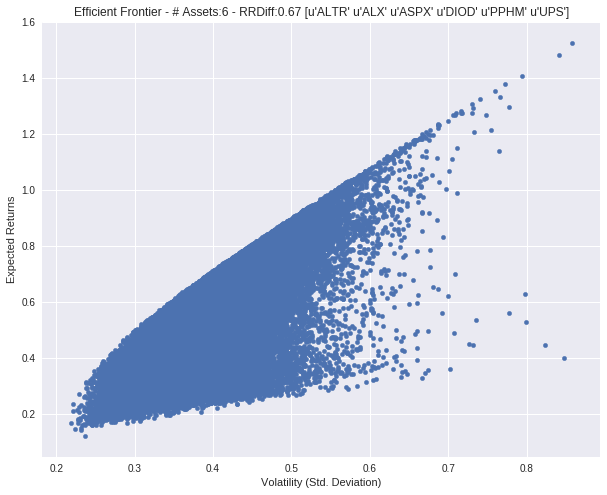

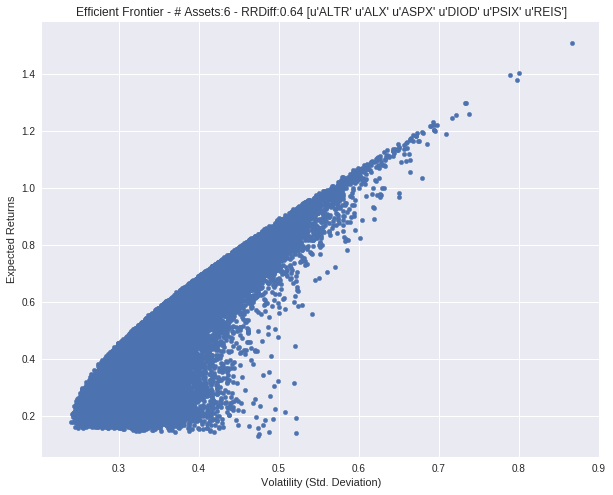

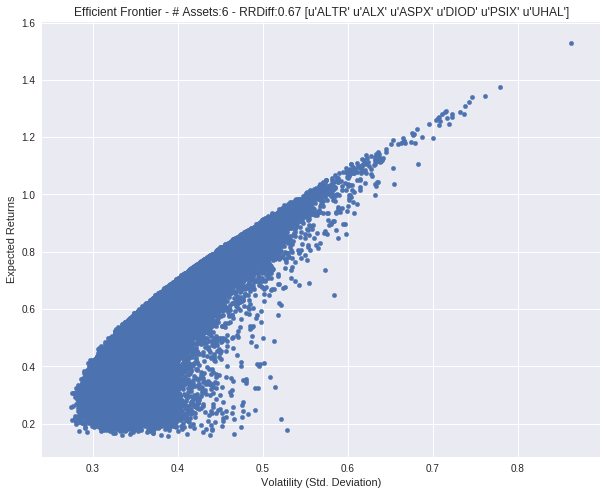

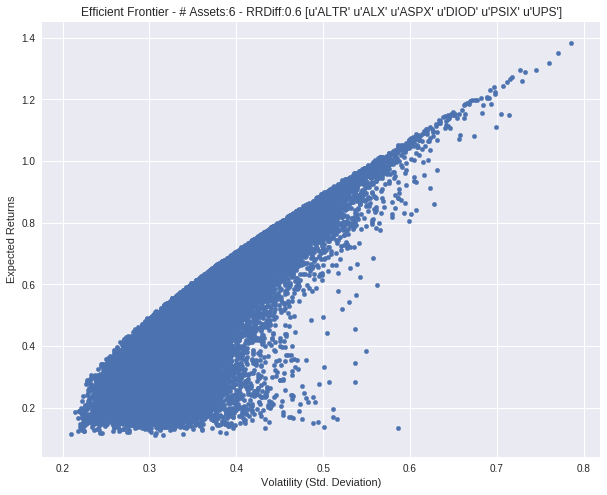

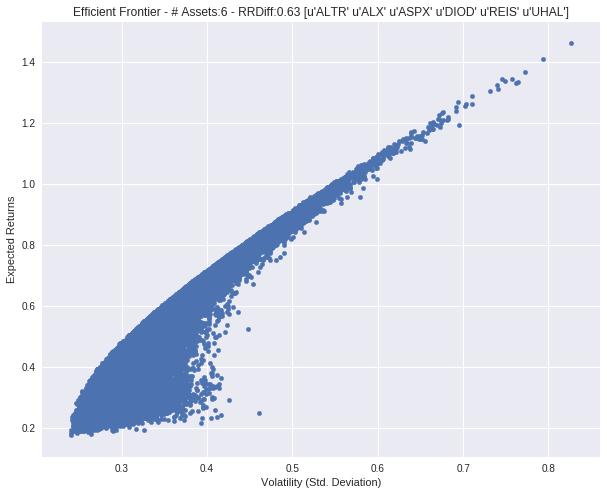

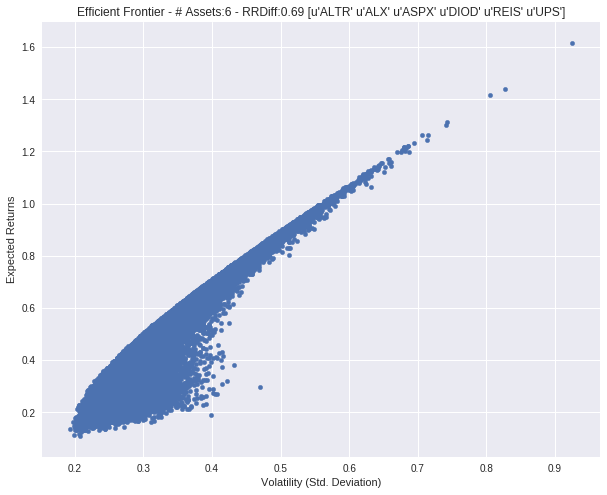

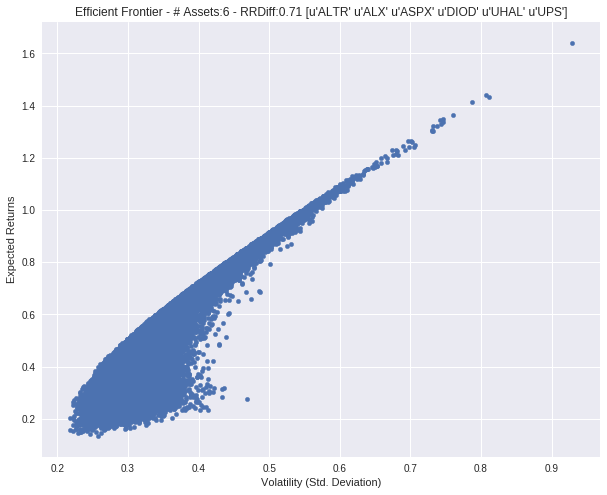

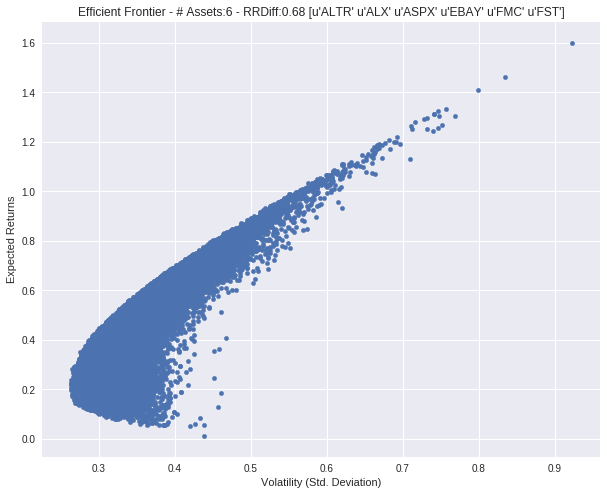

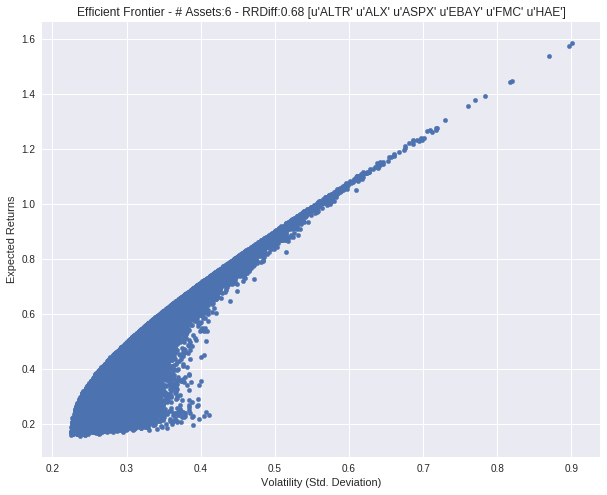

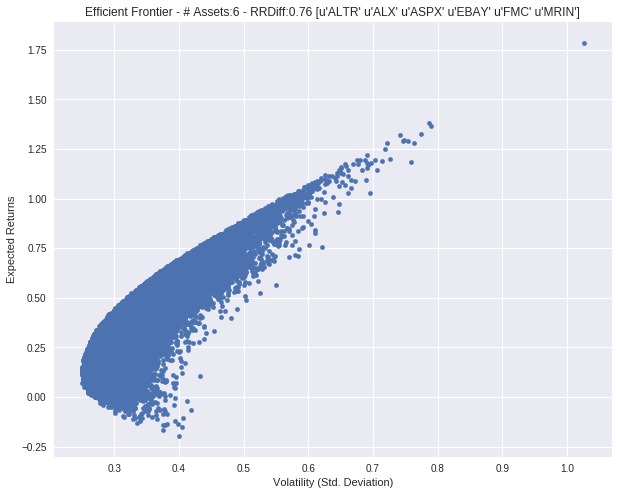

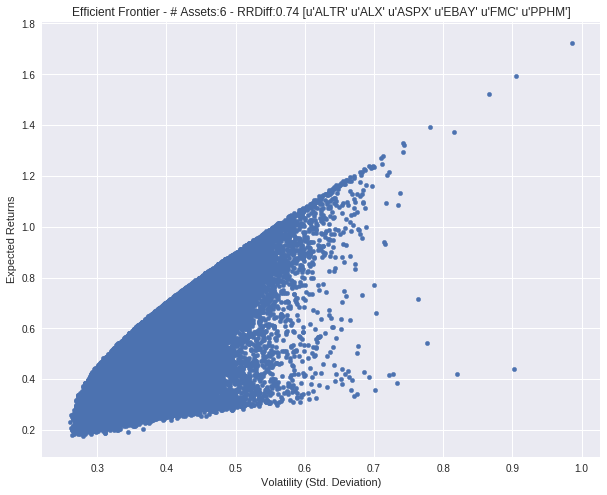

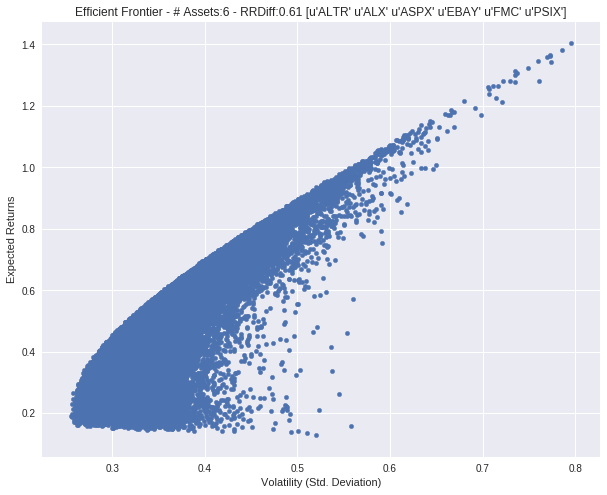

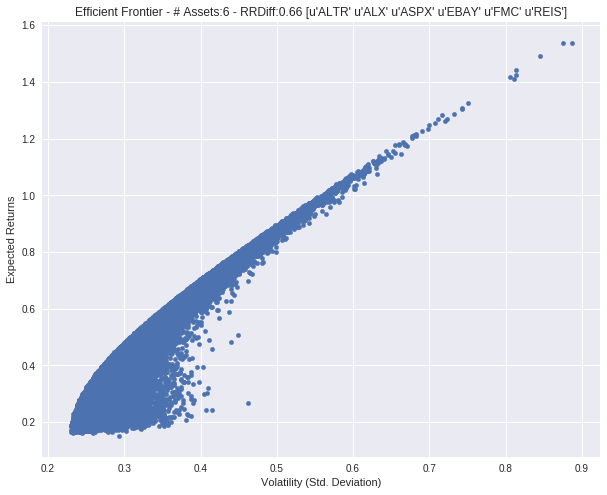

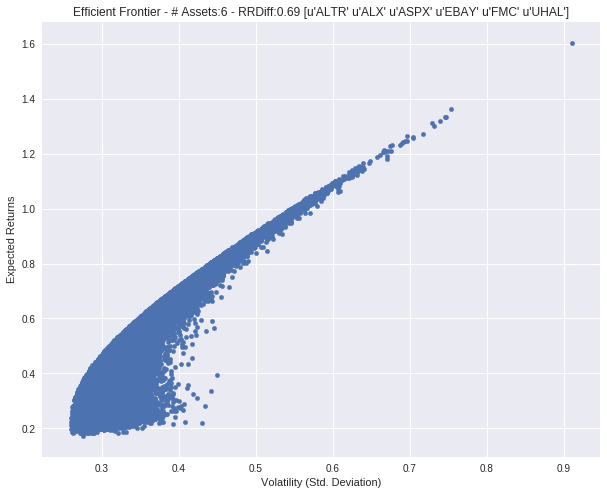

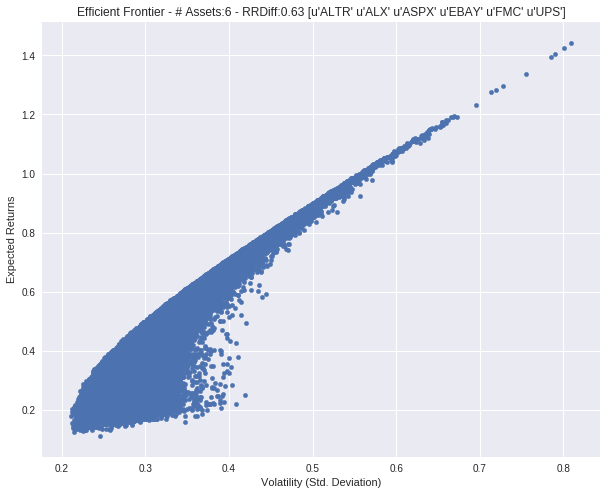

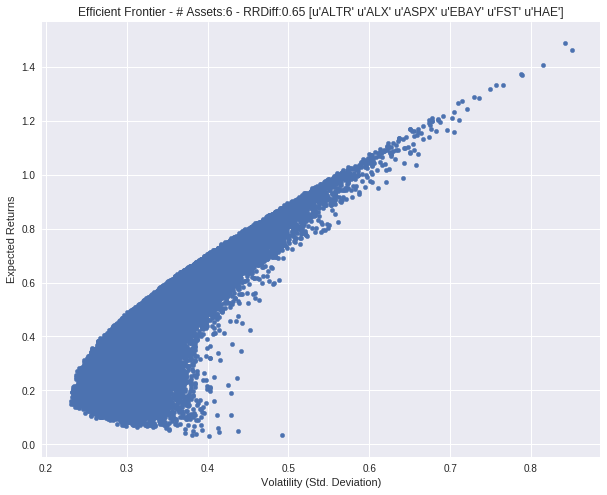

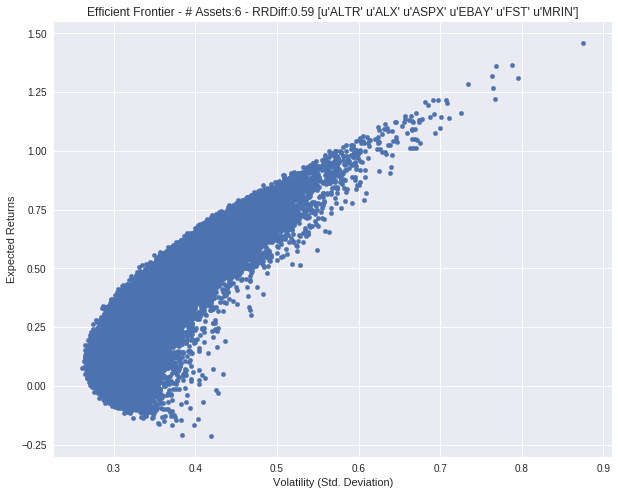

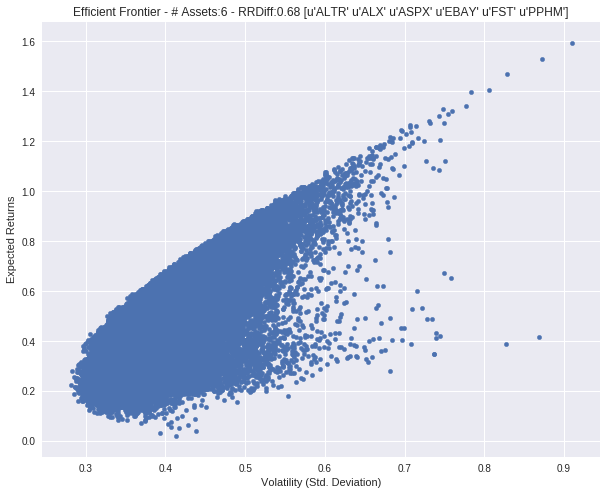

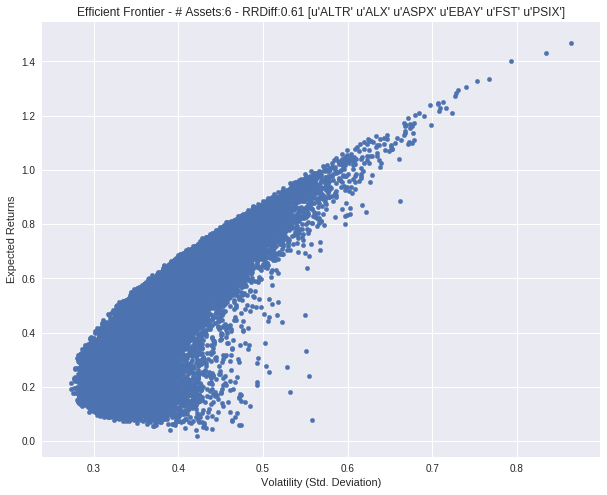

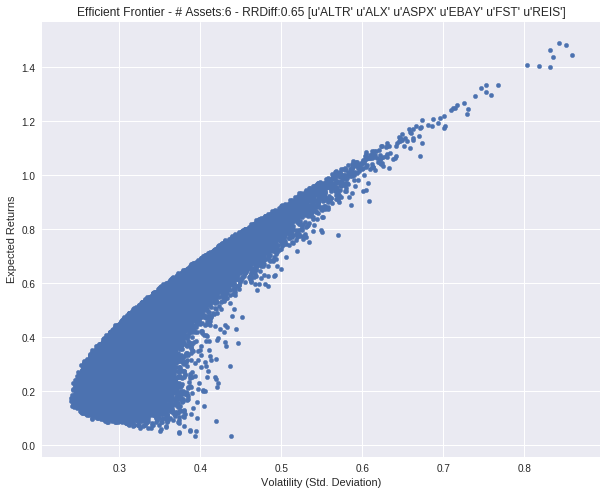

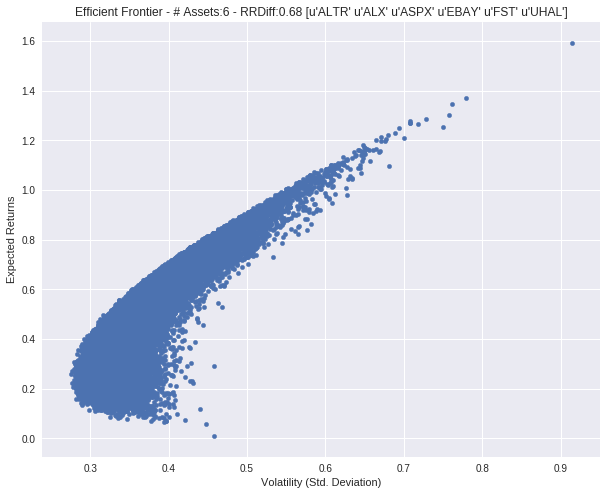

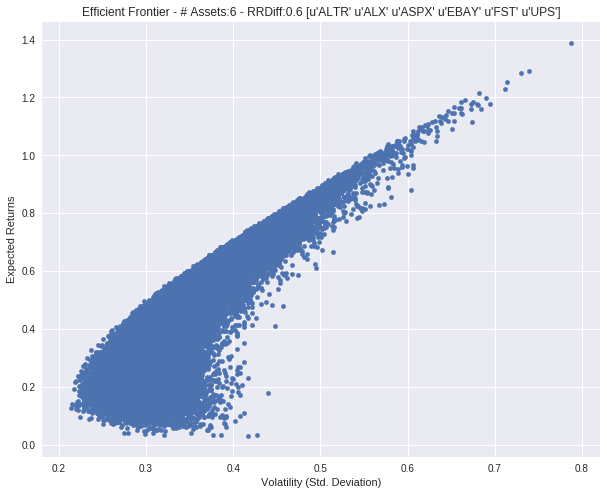

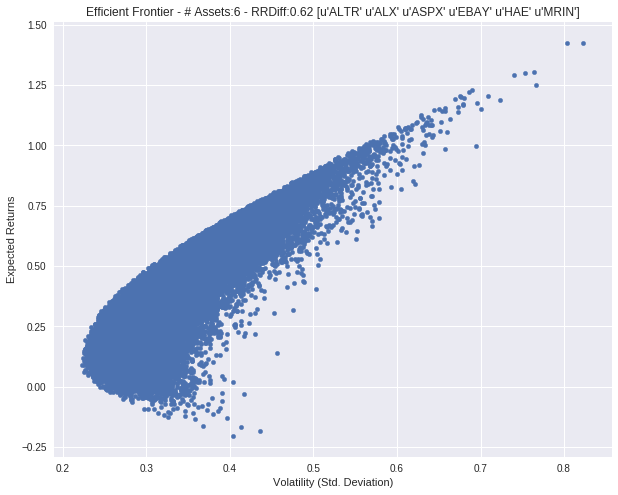

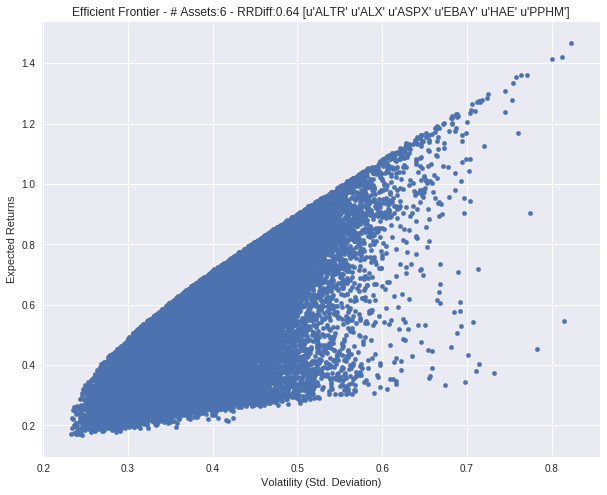

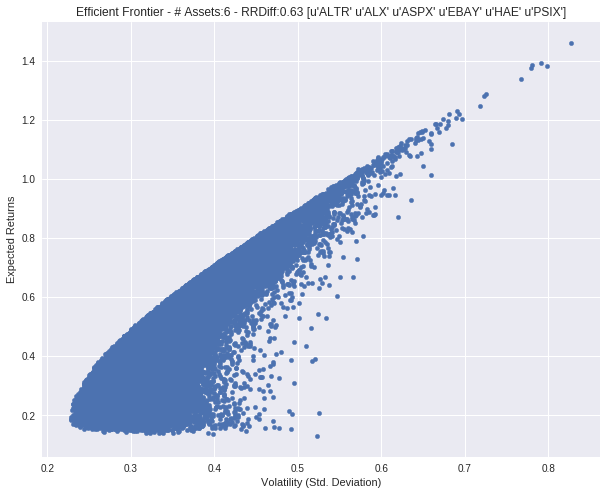

KeyboardInterrupt: 

In [7]:
# ticker symbols
stuff = table.columns.values
# all possible combinations
for L in range(6, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        calculate_portfolio(table[list(subset)], 50000)

In [157]:
table.head()

ticker           AJG  AMPE     ASNA  BXC  CBRE  CRIS      DECK  DYN  ECHO  \
date                                                                        
1999-01-04  5.720472   NaN  1.84375  NaN   NaN   NaN  0.666667  NaN   NaN   
1999-01-05  5.856919   NaN  1.87500  NaN   NaN   NaN  0.750000  NaN   NaN   
1999-01-06  5.889100   NaN  1.96875  NaN   NaN   NaN  0.708333  NaN   NaN   
1999-01-07  5.809291   NaN  1.90625  NaN   NaN   NaN  0.771000  NaN   NaN   
1999-01-08  5.735919   NaN  1.98500  NaN   NaN   NaN  0.729333  NaN   NaN   

ticker      ENTA    ...       MCRI      OLED  PRU  RECN  SIGA  TGH  TTMI  \
date                ...                                                    
1999-01-04   NaN    ...     2.7190  4.246451  NaN   NaN  1.75  NaN   NaN   
1999-01-05   NaN    ...     2.7200  4.246451  NaN   NaN  1.56  NaN   NaN   
1999-01-06   NaN    ...     2.7190  4.121556  NaN   NaN  1.81  NaN   NaN   
1999-01-07   NaN    ...     2.7815  3.996660  NaN   NaN  1.56  NaN   NaN   
1999-01-08   NaN    ...     2.8125  4.184503  NaN   NaN  1.50  NaN   NaN   

ticker           WDR       WOR       WRB  
date                                      
1999-01-04  8.035724  6.141616  4.976037  
1999-01-05  8.163604  6.491262  5.115468  
1999-01-06  8.253466  6.937188  5.125963  
1999-01-07  8.187798  6.394983  4.853098  
1999-01-08  8.035724  6.810505  4.853098  

[5 rows x 28 columns]

In [201]:
percentage_change = table.pct_change()
table.loc['2014-02-06']

ticker
AJG     39.694495
AMPE     8.250000
ASNA    18.740000
BXC     16.000000
CBRE          NaN
CRIS     2.670000
DECK    78.260000
DYN     20.670000
ECHO    18.210000
ENTA    35.000000
GDOT    21.590000
GILD    72.304628
GTT      9.300000
HSIC    55.760000
HWCC    11.430540
KORS    91.500000
KRA     25.580000
LDL     17.350000
MCRI    18.050000
OLED    30.964123
PRU     73.554270
RECN    11.866081
SIGA     3.110000
TGH     30.809072
TTMI     8.280000
WDR     50.644235
WOR     35.094765
WRB     35.837836
Name: 2014-02-06 00:00:00, dtype: float64

In [171]:
table.pct_change()

ticker           AJG      AMPE      ASNA       BXC      CBRE      CRIS  \
date                                                                     
1999-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1999-01-05  0.023852       NaN  0.016949       NaN       NaN       NaN   
1999-01-06  0.005495       NaN  0.050000       NaN       NaN       NaN   
1999-01-07 -0.013552       NaN -0.031746       NaN       NaN       NaN   
1999-01-08 -0.012630       NaN  0.041311       NaN       NaN       NaN   
1999-01-11  0.009874       NaN  0.000000       NaN       NaN       NaN   
1999-01-12 -0.002667       NaN  0.001889       NaN       NaN       NaN   
1999-01-13 -0.008467       NaN -0.033312       NaN       NaN       NaN   
1999-01-14 -0.019551       NaN -0.016255       NaN       NaN       NaN   
1999-01-15 -0.028650       NaN  0.007931       NaN       NaN       NaN   
1999-01-19  0.050024       NaN  0.024918       NaN       NaN       NaN   
1999-01-20  0.009888       NaN  0.031990       NaN       NaN       NaN   
1999-01-21 -0.009791       NaN  0.000000       NaN       NaN       NaN   
1999-01-22 -0.013933       NaN  0.007440       NaN       NaN       NaN   
1999-01-25  0.025524       NaN -0.022769       NaN       NaN       NaN   
1999-01-26  0.001333       NaN  0.019521       NaN       NaN       NaN   
1999-01-27  0.009765       NaN -0.015442       NaN       NaN       NaN   
1999-01-28  0.035824       NaN  0.000000       NaN       NaN       NaN   
1999-01-29  0.060895       NaN  0.007528       NaN       NaN       NaN   
1999-02-01 -0.052400       NaN  0.000000       NaN       NaN       NaN   
1999-02-02 -0.030393       NaN  0.008095       NaN       NaN       NaN   
1999-02-03  0.015020       NaN -0.011736       NaN       NaN       NaN   
1999-02-04 -0.024233       NaN -0.003750       NaN       NaN       NaN   
1999-02-05 -0.002637       NaN  0.011920       NaN       NaN       NaN   
1999-02-08 -0.008374       NaN -0.077495       NaN       NaN       NaN   
1999-02-09  0.002889       NaN -0.055108       NaN       NaN       NaN   
1999-02-10 -0.008420       NaN  0.013514       NaN       NaN       NaN   
1999-02-11  0.009832       NaN -0.052632       NaN       NaN       NaN   
1999-02-12 -0.006860       NaN -0.022963       NaN       NaN       NaN   
1999-02-16  0.011141       NaN  0.006823       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2018-02-13  0.011630  0.071661  0.046632  0.032581       NaN -0.037400   
2018-02-14  0.018214  0.018237  0.054455 -0.021238       NaN  0.018484   
2018-02-15  0.012463  0.032836  0.042254  0.000620       NaN  0.025185   
2018-02-16 -0.001159 -0.144509 -0.009009  0.021685       NaN -0.013728   
2018-02-20  0.004930 -0.152027 -0.013636  0.032141       NaN -0.006044   
2018-02-21 -0.005771  0.095618  0.013825 -0.059342       NaN -0.016215   
2018-02-22 -0.011319 -0.090909  0.022727 -0.051218       NaN -0.067803   
2018-02-23  0.012623  0.028000  0.017778 -0.000658       NaN  0.002813   
2018-02-26  0.011161 -0.027237  0.030568 -0.001976       NaN -0.018233   
2018-02-27  0.003154 -0.056000 -0.021186 -0.029043       NaN -0.010000   
2018-02-28 -0.012432 -0.059322 -0.017316  0.027872       NaN  0.020408   
2018-03-01 -0.010708 -0.027027 -0.004405  0.066138       NaN -0.027677   
2018-03-02  0.004242  0.064815  0.079646 -0.011787       NaN  0.087679   
2018-03-05  0.014565  0.034783 -0.008197 -0.013810       NaN  0.134670   
2018-03-06 -0.000718  0.016807 -0.059917  0.007002       NaN  0.001852   
2018-03-07 -0.000862  0.053719 -0.059341  0.031606       NaN -0.045707   
2018-03-08  0.007189 -0.023529  0.004673 -0.035539       NaN  0.311851   
2018-03-09  0.036831 -0.028112 -0.065116  0.003177       NaN  0.114228   
2018-03-12 -0.012667 -0.016529  0.009950  0.775174       NaN  0.180701   
2018-03-13 -0.006136 -0.029412  0.000000  0.215127       NaN -0.160086   
2018-03-14 -0.007437  0.008658 -0.004926  0.008221       NaN -0.020408   
2018

## do backtesting

In [211]:
date_of_past_price = '2014-01-06'

def calculate_taxes(asset):
    return table.loc[date_of_past_price][asset]
    
    
df["price2014"] = df.assets.apply(calculate_taxes)
df.head()

alloc assets  price price2014
0     12    AJG  67.53   41.0657
1    305   AMPE   3.11      7.43
2    572   ASNA   2.03     22.54
3      6    BXC  30.96      18.2
4     51   CBRE  46.68       NaN

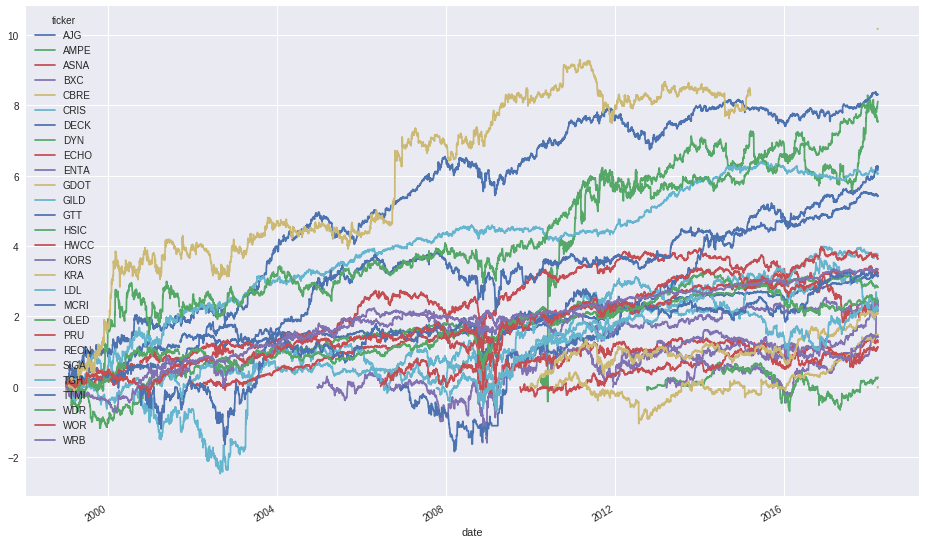

In [221]:
plt.rcParams['figure.figsize'] = (16.0, 10.0)
table.pct_change().cumsum().plot()

## cummulative change plot

date
1999    AxesSubplot(0.125,0.2;0.775x0.68)
2000    AxesSubplot(0.125,0.2;0.775x0.68)
2001    AxesSubplot(0.125,0.2;0.775x0.68)
2002    AxesSubplot(0.125,0.2;0.775x0.68)
2003    AxesSubplot(0.125,0.2;0.775x0.68)
2004    AxesSubplot(0.125,0.2;0.775x0.68)
2005    AxesSubplot(0.125,0.2;0.775x0.68)
2006    AxesSubplot(0.125,0.2;0.775x0.68)
2007    AxesSubplot(0.125,0.2;0.775x0.68)
2008    AxesSubplot(0.125,0.2;0.775x0.68)
2009    AxesSubplot(0.125,0.2;0.775x0.68)
2010    AxesSubplot(0.125,0.2;0.775x0.68)
2011    AxesSubplot(0.125,0.2;0.775x0.68)
2012    AxesSubplot(0.125,0.2;0.775x0.68)
2013    AxesSubplot(0.125,0.2;0.775x0.68)
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.2;0.775x0.68)
2018    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

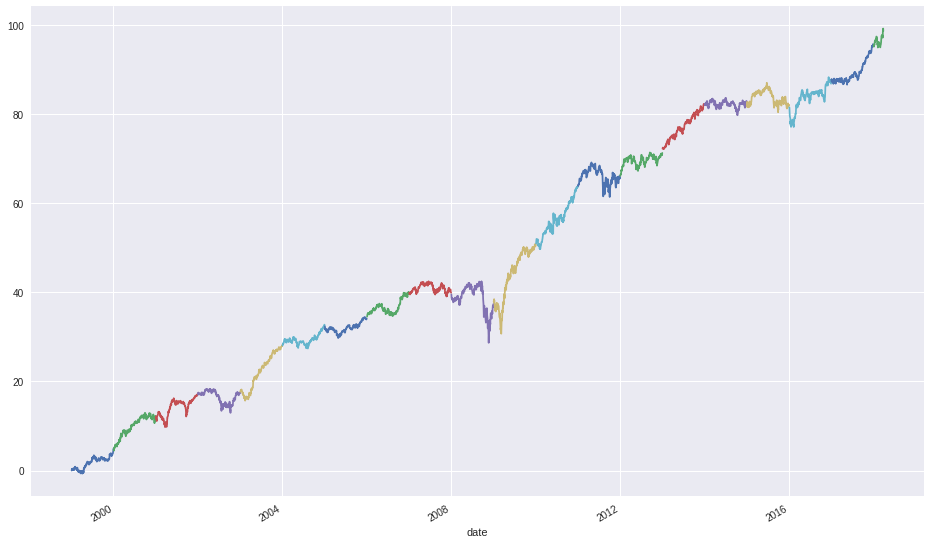

In [307]:
table.pct_change().sum(axis=1).cumsum().groupby(table.index.year).plot()

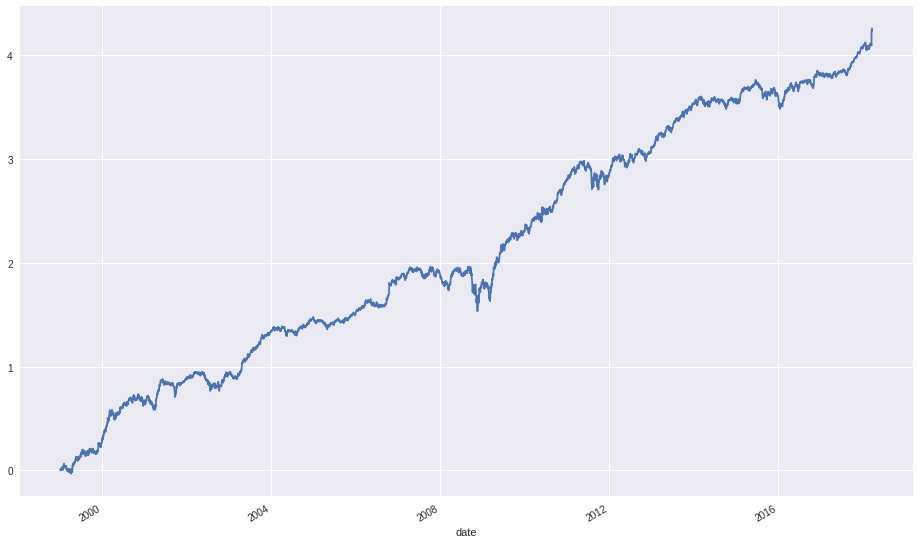

In [325]:
(prt_allocation_pct * table.pct_change()).sum(axis=1).cumsum().plot()

date
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.2;0.775x0.68)
2018    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

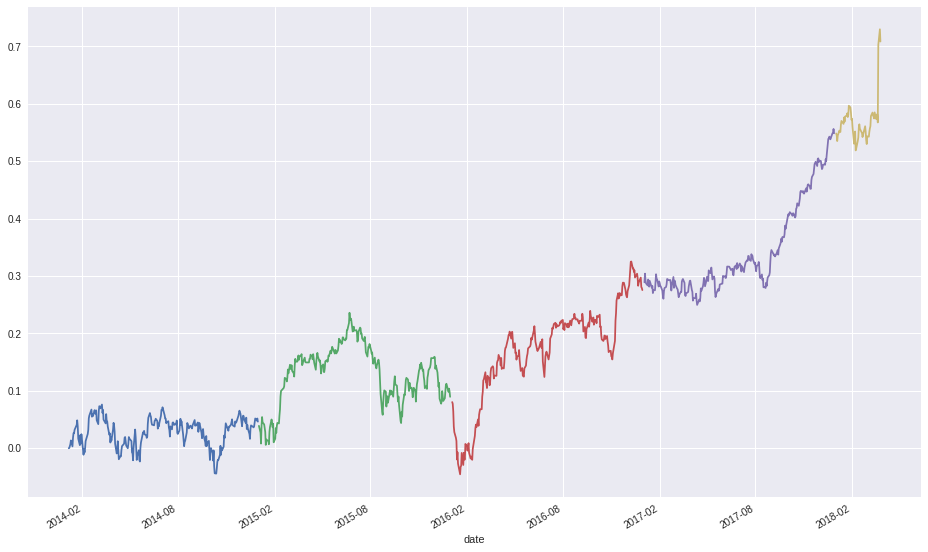

In [328]:
(prt_allocation_pct * table.iloc[table.index.get_loc(date_of_past_price):].pct_change()).sum(axis=1).cumsum().groupby(table.iloc[table.index.get_loc(date_of_past_price):].index.year).plot()

date
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.2;0.775x0.68)
2018    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

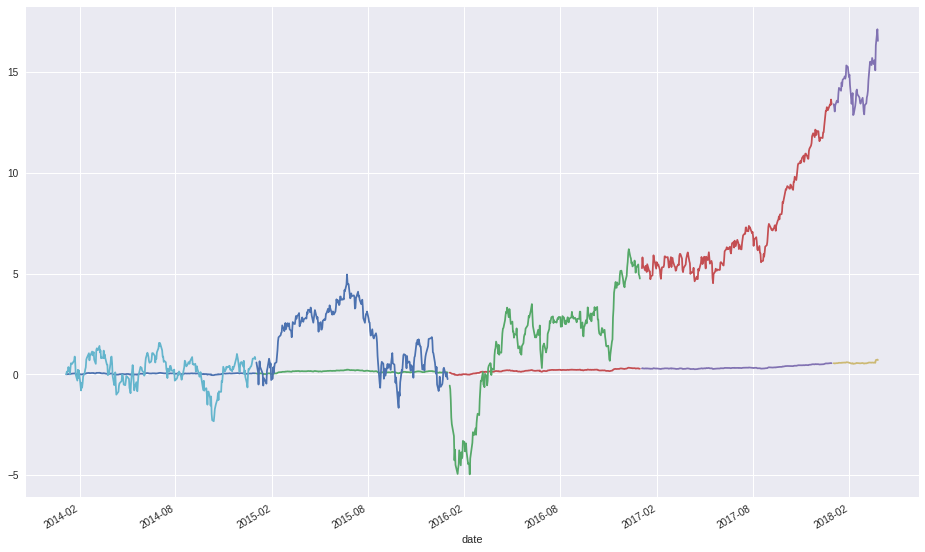

In [327]:
ax = (prt_allocation_pct * table.iloc[table.index.get_loc(date_of_past_price):].pct_change()).sum(axis=1).cumsum().groupby(table.iloc[table.index.get_loc(date_of_past_price):].index.year).plot()
table.iloc[table.index.get_loc(date_of_past_price):].pct_change().sum(axis=1).cumsum().groupby(table.iloc[table.index.get_loc(date_of_past_price):].index.year).plot()

In [314]:
np.nansum(df.init_purchase2014.values) * 

38760.423824503559

date
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.2;0.775x0.68)
2018    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

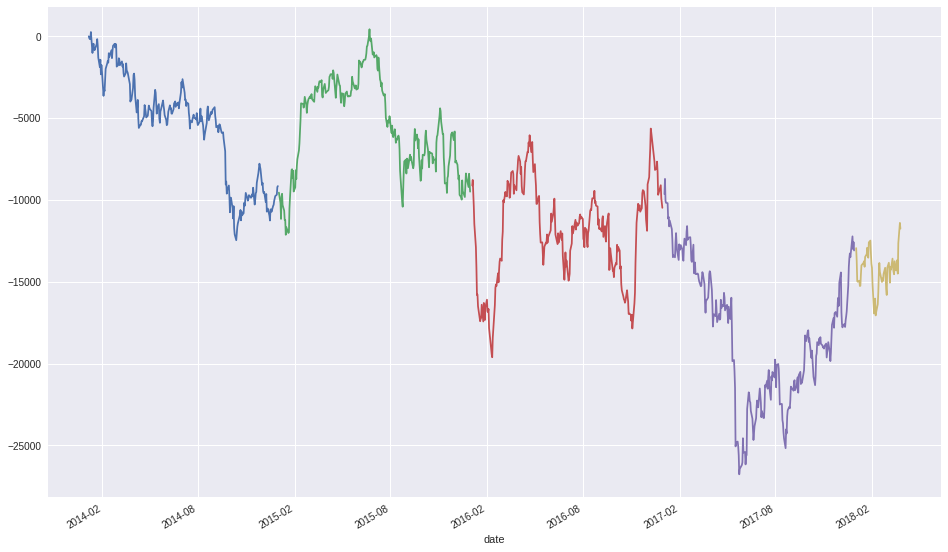

In [323]:
## TODO ##

(df.init_purchase2014.values * table.iloc[table.index.get_loc(date_of_past_price):].pct_change()).sum(axis=1).cumsum().groupby(table.iloc[table.index.get_loc(date_of_past_price):].index.year).plot()

In [230]:
df["init_purchase2014"] = df["alloc"]*df["price2014"] 
df

alloc assets     price price2014 init_purchase2014
0      12    AJG   67.5300   41.0657           492.789
1     305   AMPE    3.1100      7.43           2266.15
2     572   ASNA    2.0300     22.54           12892.9
3       6    BXC   30.9600      18.2             109.2
4      51   CBRE   46.6800       NaN               NaN
5    1141   CRIS    0.6681      2.99           3411.59
6      20   DECK   91.2900     87.99            1759.8
7       4    DYN   13.5400      21.1              84.4
8      67   ECHO   26.3000     20.65           1383.55
9       3   ENTA   81.8400     28.68             86.04
10     19   GDOT   65.1500     24.91            473.29
11     34   GILD   74.1100   69.2234            2353.6
12     48    GTT   54.3500         7               336
13     21   HSIC   65.0800    56.825           1193.33
14    142   HWCC    7.4000   11.7428           1667.48
15     25   KORS   61.5100     82.04              2051
16     29    KRA   47.3700     22.76            660.04
17     36    LDL   46.7500     17.14            617.04
18     17   MCRI   42.0100      18.7             317.9
19     14   OLED  105.3000   33.0124           462.174
20      4    PRU  102.5600   80.9321           323.728
21     35   RECN   15.8500   13.0843            457.95
22    458   SIGA    6.0300      3.33           1525.14
23     21    TGH   16.8000   32.1453           675.051
24     57   TTMI   15.4500      8.39            478.23
25     29    WDR   19.7500   51.1567           1483.55
26     31    WOR   40.8900   38.6623           1198.53
27      0    WRB   71.2200   39.3263                 0

In [231]:
df.init_purchase2014.sum()

38760.423824503559

In [228]:
table.pct_change().cumsum().head()

ticker           AJG  AMPE      ASNA  BXC  CBRE  CRIS      DECK  DYN  ECHO  \
date                                                                         
1999-01-04       NaN   NaN       NaN  NaN   NaN   NaN       NaN  NaN   NaN   
1999-01-05  0.023852   NaN  0.016949  NaN   NaN   NaN  0.125000  NaN   NaN   
1999-01-06  0.029347   NaN  0.066949  NaN   NaN   NaN  0.069444  NaN   NaN   
1999-01-07  0.015795   NaN  0.035203  NaN   NaN   NaN  0.157915  NaN   NaN   
1999-01-08  0.003165   NaN  0.076515  NaN   NaN   NaN  0.103873  NaN   NaN   

ticker      ENTA    ...             MCRI      OLED  PRU  RECN      SIGA  TGH  \
date                ...                                                        
1999-01-04   NaN    ...              NaN       NaN  NaN   NaN       NaN  NaN   
1999-01-05   NaN    ...     3.677823e-04  0.000000  NaN   NaN -0.108571  NaN   
1999-01-06   NaN    ...     1.352141e-07 -0.029412  NaN   NaN  0.051685  NaN   
1999-01-07   NaN    ...     2.298653e-02 -0.059715  NaN   NaN -0.086437  NaN   
1999-01-08   NaN    ...     3.413159e-02 -0.012715  NaN   NaN -0.124898  NaN   

ticker      TTMI       WDR       WOR       WRB  
date                                            
1999-01-04   NaN       NaN       NaN       NaN  
1999-01-05   NaN  0.015914  0.056931  0.028020  
1999-01-06   NaN  0.026922  0.125627  0.030072  
1999-01-07   NaN  0.018965  0.047468 -0.023160  
1999-01-08   NaN  0.000392  0.112444 -0.023160  

[5 rows x 28 columns]

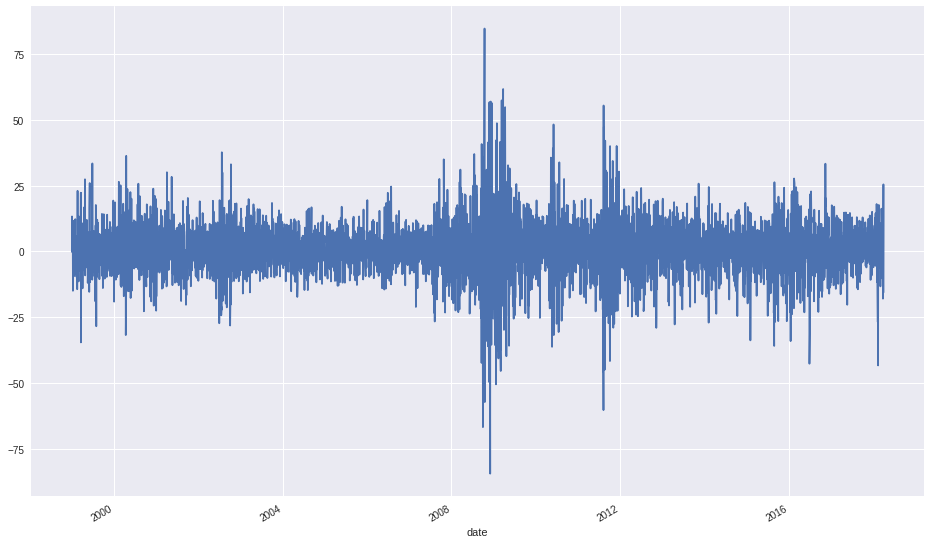

In [298]:
(df.price2014.values * table.pct_change()).sum(axis=1).plot()

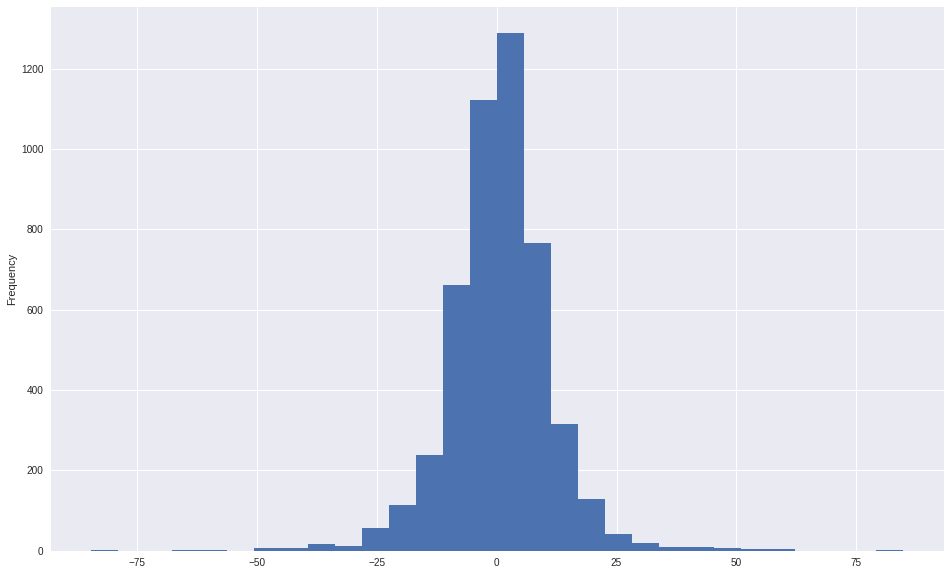

In [300]:
(df.price2014.values * table.pct_change()).sum(axis=1).plot.hist(bins=30)

## daily gains/loses

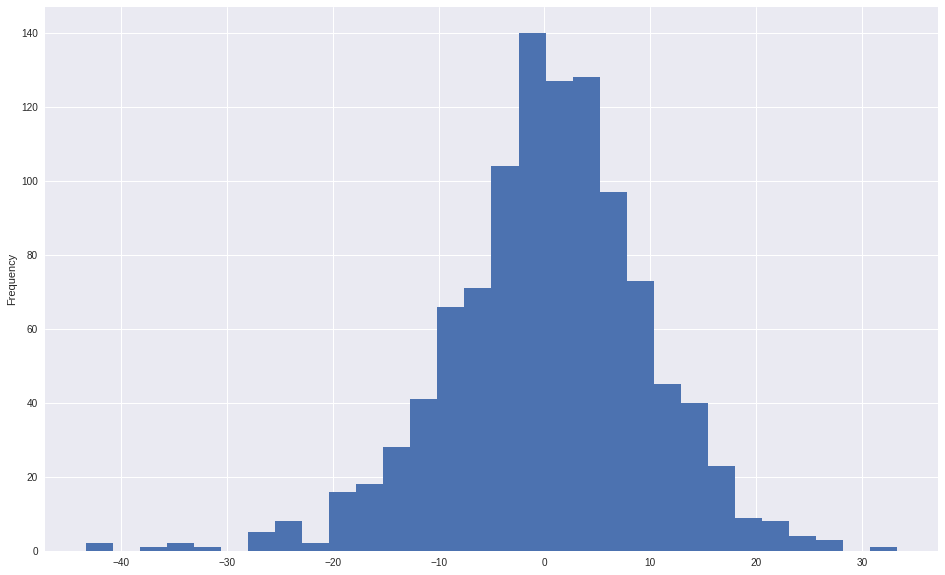

In [301]:
(df.price2014.values * table.iloc[table.index.get_loc(date_of_past_price):].pct_change()).sum(axis=1).plot.hist(bins=30)

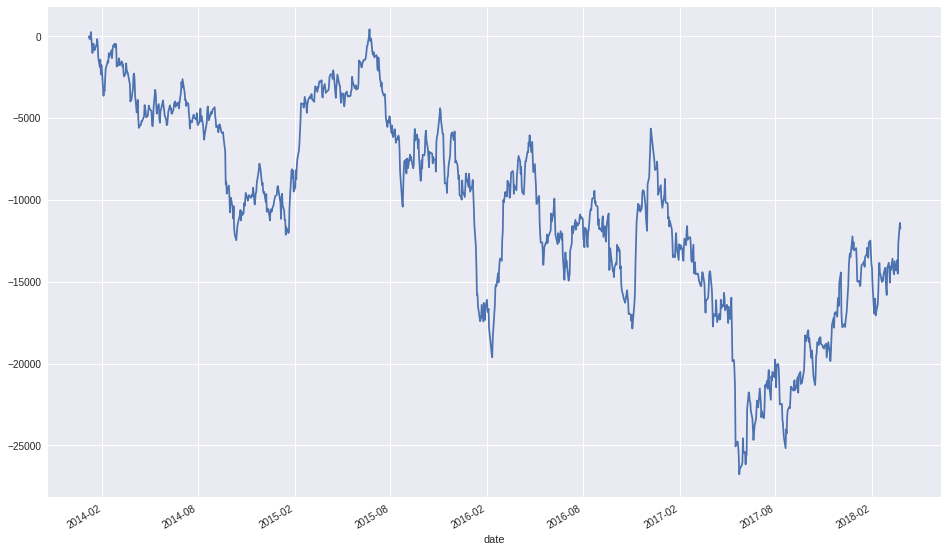

In [308]:
(df.init_purchase2014.values * table.iloc[table.index.get_loc(date_of_past_price):].pct_change()).sum(axis=1).cumsum().plot()